## Figure 2 paper plot notebook
 ### Part 1: Mypt keratin intensity binned and replotted


In [56]:
folderonecell1="H:\\PHD_data\\Imaging_et_analysis\\Sp8Imaging\\2023\\02_Feb\\14022023_Myptonecell\\KrtSegmentations_Ilastik\\SUMImages\\KeratinIntensity\\"
folderonecell2="H:\\PHD_data\\Imaging_et_analysis\\Sp8Imaging\\2023\\02_Feb\\21022022_Myptonecell\\KeratinIntensity\\"

In [57]:
#import required libraries
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import os
from glob import glob
import pandas as pd
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from mpl_toolkits.mplot3d import Axes3D
from re import findall as find
from tqdm import tqdm

In [58]:
Intensityfiles=glob(folderonecell1+"*.csv")
Intensityfiles=Intensityfiles+glob(folderonecell2+"*.csv")
print("There are {} embryos in the figure".format(len(Intensityfiles)))

There are 12 embryos in the figure


In [59]:
intensityData=pd.DataFrame()
binnedIntensityData=pd.DataFrame()
bin_edges= np.arange(4,12.7,0.3)
# Compute the bin averages
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
binnedIntensityData["Time (hpf)"]=bin_centers
bin_averages = np.zeros(len(bin_centers))
for file in tqdm(Intensityfiles):
    if file.find("21022022")>-1:
        if file.find("Control.csv")>-1:
            data = pd.read_csv(file)
            data["Label"]="21022023_Control"+file.split("Pos")[1][0:3]
            data["Time"]=[(x-1)*16.75/60+4 for x in data[" "]]
            intensityData = pd.concat([intensityData,data])
            for i in range(len(bin_centers)):
                bin_averages[i] = np.nanmean(data["Mean"][(data["Time"]>=bin_edges[i]) & (data["Time"]<=bin_edges[i+1])])
            binnedIntensityData["21022023_Control"+file.split("Pos")[1][0:3]]=bin_averages
    if file.find("21022022")>-1:
        if file.find("Myptonecell.csv")>-1:
            data = pd.read_csv(file)
            data["Label"]="21022023_Myptonecell"+file.split("Pos")[1][0:3]
            data["Time"]=[(x-1)*16.75/60+4 for x in data[" "]]
            intensityData = pd.concat([intensityData,data])
            for i in range(len(bin_centers)):
                bin_averages[i] = np.nanmean(data["Mean"][(data["Time"]>=bin_edges[i]) & (data["Time"]<=bin_edges[i+1])])
            binnedIntensityData["21022023_MyptOneCell"+file.split("Pos")[1][0:3]]=bin_averages
    if file.find("14022023")>-1:
        if file.find("Control.csv")>-1:
            data = pd.read_csv(file)
            data["Label"]="14022023_Control"+file.split("Pos")[1][0:3]
            data["Time"]=[(x-1)*825.08/60/60+4 for x in data[" "]]
            intensityData = pd.concat([intensityData,data])
            for i in range(len(bin_centers)):
                bin_averages[i] = np.mean(data["Mean"][(data["Time"]>=bin_edges[i]) & (data["Time"]<=bin_edges[i+1])])
            binnedIntensityData["14022023_Control"+file.split("Pos")[1][0:3]]=bin_averages
    if file.find("14022023")>-1:
        if file.find("Mypt.csv")>-1:
            data = pd.read_csv(file)
            data["Label"]="14022023_Myptonecell"+file.split("Pos")[1][0:3]
            data["Time"]=[(x-1)*825.08/60/60+4 for x in data[" "]]
            intensityData = pd.concat([intensityData,data])
            for i in range(len(bin_centers)):
                bin_averages[i] = np.mean(data["Mean"][(data["Time"]>=bin_edges[i]) & (data["Time"]<=bin_edges[i+1])])
            binnedIntensityData["14022023_MyptOneCell"+file.split("Pos")[1][0:3]]=bin_averages
savefolder="H:\\PHD_data\\Imaging_et_analysis\\PaperFigures\\Figure2\\MyptIntensity\\"
binnedIntensityData.to_csv(savefolder+"MyptIntensityOnecell.csv")

 67%|██████▋   | 8/12 [00:00<00:00, 20.51it/s]C:\Users\snaik\AppData\Local\Temp\ipykernel_27652\1628285366.py:25: RuntimeWarning: Mean of empty slice
  bin_averages[i] = np.nanmean(data["Mean"][(data["Time"]>=bin_edges[i]) & (data["Time"]<=bin_edges[i+1])])
100%|██████████| 12/12 [00:00<00:00, 21.51it/s]


In [60]:
controlmyptonecol=[x for x in binnedIntensityData.columns if x.find("Control")>-1]
controlintpd=binnedIntensityData[controlmyptonecol]
binnedIntensityData

,Time (hpf),14022023_MyptOneCell003,14022023_MyptOneCell004,14022023_Control001,14022023_Control002,14022023_MyptOneCell005,14022023_MyptOneCell006,21022023_MyptOneCell006,21022023_Control001,21022023_MyptOneCell004,21022023_MyptOneCell003,21022023_MyptOneCell005,21022023_Control002
0,4.15,85.6505,77.7795,47.1295,85.8575,126.0870,102.5075,75.7755,83.8650,64.5855,136.2645,186.374,119.1580
1,4.45,96.6370,85.2090,54.5570,102.2860,139.8080,107.7640,85.1080,110.4260,66.2020,167.4540,220.630,155.3000
2,4.75,104.3450,97.8830,58.8390,113.9260,159.7070,118.7090,94.8110,128.6450,69.7760,188.4390,245.264,181.5720
3,5.05,127.1650,112.0455,71.2790,140.3260,180.8145,127.9045,107.4820,147.2430,75.2390,215.3440,273.117,211.3230
4,5.35,150.7910,125.5220,81.8500,163.1340,204.1830,138.4230,122.2410,163.5680,80.9950,247.8000,300.573,241.9850
5,5.65,167.8350,135.5360,89.0180,178.2220,219.8050,145.2550,140.1980,179.7080,88.9100,282.8590,314.827,271.6310
6,5.95,193.3580,153.6375,100.7665,203.9435,244.8415,154.9545,158.6200,194.0610,96.5090,320.4270,337.812,303.0440
7,6.25,220.7080,172.0420,111.9010,229.1880,267.4810,149.1510,180.4020,209.4610,105.1970,363.2280,361.742,332.9380
8,6.55,238.5580,183.6510,120.5340,245.4400,289.2170,171.0260,199.3080,223.1330,113.5400,393.7030,387.462,359.0310
9,6.85,267.1325,201.3995,131.7365,271.2830,313.2215,180.9570,218.5280,234.5500,122.7180,424.4800,412.489,386.1750


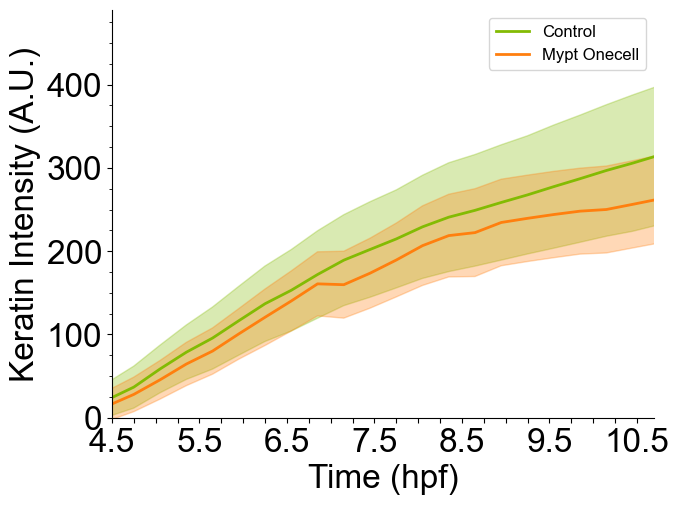

In [61]:
#plot the average of columns 1: data in binnedIntensityData dataframe as a line plot with error bars as a ribbon around the line
fig, ax = plt.subplots(figsize=(7, 5.3))
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
ax.set_xlabel("Time (hpf)")
ax.set_ylabel("Keratin Intensity (A.U.)")
ax.set_xlim(4.5,10.7)
ax.set_xticks(np.arange(4.5,10.7,0.25))
ax.set_xticklabels([ "4.5","","","","5.5","","","","6.5","","","","7.5","","", "","8.5","","","","9.5","","","","10.5"],)
ax.set_ylim(0,490)
ax.set_yticks(np.arange(0,490,25),minor=True)

# Group the columns by their label and calculate the mean for each group
control_cols = [col for col in binnedIntensityData.columns if 'Control' in col]
mypt_cols = [col for col in binnedIntensityData.columns if 'MyptOne' in col]
control_mean = binnedIntensityData[control_cols].mean(axis=1)
control_mean= [x-control_mean.iloc[0] for x in control_mean]
control_std = binnedIntensityData[control_cols].sem(axis=1)
mypt_mean = binnedIntensityData[mypt_cols].mean(axis=1)
mypt_mean= [x-mypt_mean.iloc[0] for x in mypt_mean]
mypt_std = binnedIntensityData[mypt_cols].sem(axis=1)

# Create a scatter plot of the control data
plt.plot(binnedIntensityData['Time (hpf)'], control_mean,color="#83bb03",linewidth=2, label='Control')
plt.fill_between(binnedIntensityData['Time (hpf)'], control_mean - control_std, control_mean + control_std,color="#83bb03",alpha=0.3)
# Create a line plot of the mypt data
plt.plot(binnedIntensityData['Time (hpf)'], mypt_mean, label='Mypt Onecell',color="#ff7f0e",linewidth=2)
plt.fill_between(binnedIntensityData['Time (hpf)'], mypt_mean - mypt_std, mypt_mean + mypt_std,color="#ff7f0e",alpha=0.3)
plt.legend(fontsize=12)
plt.savefig(savefolder+"MyptIntensityOnecell.png",dpi=300,bbox_inches='tight',transparent=True)
plt.savefig(savefolder+"MyptIntensityOnecell.svg",dpi=300,bbox_inches='tight',transparent=True)
plt.savefig(savefolder+"MyptIntensityOnecell.pdf",dpi=300,bbox_inches='tight',transparent=True)
# Show the plot
plt.show()

In [62]:
folderysl="H:\\PHD_data\\Imaging_et_analysis\\Sp8Imaging\\2023\\02_Feb\\15022023_MyptYSLinj\\IntensityMeasurement\\KeratinIntensity\\"
folderysl2="H:\\PHD_data\\Imaging_et_analysis\\Sp5imaging\\2020\\Jun\\14062020_Mypt\\KeratinIntensity\\"
folderysl3="H:/PHD_data/Imaging_et_analysis/Sp8Imaging/2022/06_Jun/04062022_MyptYSL/KeratinIntensity/"
# TODO : Add other folders such as the one below
undonefolderysl="H:/PHD_data/Imaging_et_analysis/Sp8Imaging/2022/09_Sept/19092022_myptYsl_badexp/"
yslfiles=glob(folderysl+"*.csv")
yslfiles2=glob(folderysl2+"*.csv")
yslfiles3=glob(folderysl3+"*.csv")

In [63]:
intensityYSLData=pd.DataFrame()
#binnedIntensityData=pd.DataFrame()
bin_edges= np.arange(4,12.7,0.3)
# Compute the bin averages
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
binnedIntensityData["Time (hpf)"]=bin_centers
bin_averages = np.zeros(len(bin_centers))
for file in yslfiles:
    if file.find("Control")>-1:
        data = pd.read_csv(file)
        data["Label"]=file.split("Pos")[1][0:3]
        data["Time"]=[(x-1)*747.19/60/60+4 for x in data[" "]]
        intensityYSLData = pd.concat([intensityYSLData,data])
        for i in range(len(bin_centers)):
            bin_averages[i] = np.nanmean(data["Mean"][(data["Time"]>=bin_edges[i]) & (data["Time"]<=bin_edges[i+1])])
        binnedIntensityData["15022023_Control"+file.split("Pos")[1][0:3]]=bin_averages
    if file.find("MyptYslinj.csv")>-1:
        data = pd.read_csv(file)
        data["Label"]=file.split("Pos")[1][0:3]
        data["Time"]=[(x-1)*747.19/60/60+4 for x in data[" "]]
        intensityYSLData = pd.concat([intensityYSLData,data])
        for i in range(len(bin_centers)):
            bin_averages[i] = np.nanmean(data["Mean"][(data["Time"]>=bin_edges[i]) & (data["Time"]<=bin_edges[i+1])])
        binnedIntensityData["15022023_MyptYSL"+file.split("Pos")[1][0:3]]=bin_averages

for file in yslfiles2:
    if file.find("Control")>-1:
        data2 = pd.read_csv(file)
        data2["Label"]=file.split("Pos")[1][0:3]
        data2["Time"]=[(x-1)*880.02/60/60+4 for x in data2[" "]]
        intensityYSLData = pd.concat([intensityYSLData,data2])
        for i in range(len(bin_centers)):
            bin_averages[i] = np.nanmean(data2["Mean"][(data2["Time"]>=bin_edges[i]) & (data2["Time"]<=bin_edges[i+1])])
        binnedIntensityData["14062020_Control"+file.split("Pos")[1][0:3]]=bin_averages
    if file.find("MyptYslinj.csv")>-1:
        data2 = pd.read_csv(file)
        data2["Label"]=file.split("Pos")[1][0:3]
        data2["Time"]=[(x-1)*880.02/60/60+4 for x in data2[" "]]
        intensityYSLData = pd.concat([intensityYSLData,data2])
        for i in range(len(bin_centers)):
            bin_averages[i] = np.nanmean(data2["Mean"][(data2["Time"]>=bin_edges[i]) & (data2["Time"]<=bin_edges[i+1])])
        binnedIntensityData["14062020_MyptYSL"+file.split("Pos")[1][0:3]]=bin_averages
for file in yslfiles3:
    if file.find("Control")>-1:
        data3 = pd.read_csv(file)
        data3["Label"]=file.split("Pos")[1][0:3]
        data3["Time"]=[(x-1)*884.95/60/60+4 for x in data3[" "]]
        intensityYSLData = pd.concat([intensityYSLData,data3])
        for i in range(len(bin_centers)):
            bin_averages[i] = np.nanmean(data3["Mean"][(data3["Time"]>=bin_edges[i]) & (data3["Time"]<=bin_edges[i+1])])
        binnedIntensityData["04062022_Control"+file.split("Pos")[1][0:3]]=bin_averages
    if file.find("Mypt")>-1:
        data3 = pd.read_csv(file)
        data3["Label"]=file.split("Pos")[1][0:3]
        data3["Time"]=[(x-1)*884.95/60/60+4 for x in data3[" "]]
        intensityYSLData = pd.concat([intensityYSLData,data3])
        for i in range(len(bin_centers)):
            bin_averages[i] = np.nanmean(data3["Mean"][(data3["Time"]>=bin_edges[i]) & (data3["Time"]<=bin_edges[i+1])])
        binnedIntensityData["04062022_MyptYSL"+file.split("Pos")[1][0:3]]=bin_averages
savefolder="H:\\PHD_data\\Imaging_et_analysis\\PaperFigures\\Figure2\\MyptIntensity\\"
#binnedIntensityData.to_csv(savefolder+"MyptIntensityYSLinj.csv")

C:\Users\snaik\AppData\Local\Temp\ipykernel_27652\2784497624.py:41: RuntimeWarning: Mean of empty slice
  bin_averages[i] = np.nanmean(data2["Mean"][(data2["Time"]>=bin_edges[i]) & (data2["Time"]<=bin_edges[i+1])])
C:\Users\snaik\AppData\Local\Temp\ipykernel_27652\2784497624.py:41: RuntimeWarning: Mean of empty slice
  bin_averages[i] = np.nanmean(data2["Mean"][(data2["Time"]>=bin_edges[i]) & (data2["Time"]<=bin_edges[i+1])])
C:\Users\snaik\AppData\Local\Temp\ipykernel_27652\2784497624.py:41: RuntimeWarning: Mean of empty slice
  bin_averages[i] = np.nanmean(data2["Mean"][(data2["Time"]>=bin_edges[i]) & (data2["Time"]<=bin_edges[i+1])])
C:\Users\snaik\AppData\Local\Temp\ipykernel_27652\2784497624.py:33: RuntimeWarning: Mean of empty slice
  bin_averages[i] = np.nanmean(data2["Mean"][(data2["Time"]>=bin_edges[i]) & (data2["Time"]<=bin_edges[i+1])])
C:\Users\snaik\AppData\Local\Temp\ipykernel_27652\2784497624.py:33: RuntimeWarning: Mean of empty slice
  bin_averages[i] = np.nanmean(data2

In [64]:
binnedIntensityData.to_csv("H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure2/KeratinIntensityMyptCaRhoA/MyptIntensityYSLoneCinj.csv",mode="w")
binnedIntensityData

,Time (hpf),14022023_MyptOneCell003,14022023_MyptOneCell004,14022023_Control001,14022023_Control002,14022023_MyptOneCell005,14022023_MyptOneCell006,21022023_MyptOneCell006,21022023_Control001,21022023_MyptOneCell004,...,14062020_MyptYSL001,04062022_Control001,04062022_MyptYSL001,04062022_MyptYSL007,04062022_MyptYSL006,04062022_MyptYSL005,04062022_MyptYSL004,04062022_MyptYSL003,04062022_Control002,04062022_MyptYSL002
0,4.15,85.6505,77.7795,47.1295,85.8575,126.0870,102.5075,75.7755,83.8650,64.5855,...,179.6985,124.0830,124.0830,49.4860,38.7250,53.5020,108.3455,53.5440,91.2120,91.2120
1,4.45,96.6370,85.2090,54.5570,102.2860,139.8080,107.7640,85.1080,110.4260,66.2020,...,195.3930,137.2120,137.2120,52.3980,42.6210,77.4190,115.5700,58.7570,101.2880,101.2880
2,4.75,104.3450,97.8830,58.8390,113.9260,159.7070,118.7090,94.8110,128.6450,69.7760,...,205.6130,146.1720,146.1720,53.8180,45.8020,91.6500,118.5470,61.9290,106.3790,106.3790
3,5.05,127.1650,112.0455,71.2790,140.3260,180.8145,127.9045,107.4820,147.2430,75.2390,...,209.2340,153.0320,153.0320,55.2520,48.2060,100.6240,122.5720,65.2900,110.2940,110.2940
4,5.35,150.7910,125.5220,81.8500,163.1340,204.1830,138.4230,122.2410,163.5680,80.9950,...,225.8325,158.6620,158.6620,56.8790,50.4495,105.7180,128.0155,67.8950,115.1905,115.1905
5,5.65,167.8350,135.5360,89.0180,178.2220,219.8050,145.2550,140.1980,179.7080,88.9100,...,255.9060,158.9000,158.9000,59.4800,53.0900,106.4490,128.8750,71.8160,120.1970,120.1970
6,5.95,193.3580,153.6375,100.7665,203.9435,244.8415,154.9545,158.6200,194.0610,96.5090,...,295.8920,159.1120,159.1120,61.8820,55.9220,109.6350,130.9680,76.0840,123.8760,123.8760
7,6.25,220.7080,172.0420,111.9010,229.1880,267.4810,149.1510,180.4020,209.4610,105.1970,...,311.0480,162.0990,162.0990,64.8490,59.2350,112.2860,137.9020,79.8540,130.2370,130.2370
8,6.55,238.5580,183.6510,120.5340,245.4400,289.2170,171.0260,199.3080,223.1330,113.5400,...,339.0320,164.4620,164.4620,67.3390,62.5440,116.5440,141.4790,82.4510,134.2160,134.2160
9,6.85,267.1325,201.3995,131.7365,271.2830,313.2215,180.9570,218.5280,234.5500,122.7180,...,366.3020,168.9210,168.9210,71.2625,67.3280,121.9290,144.8745,87.9545,139.5315,139.5315


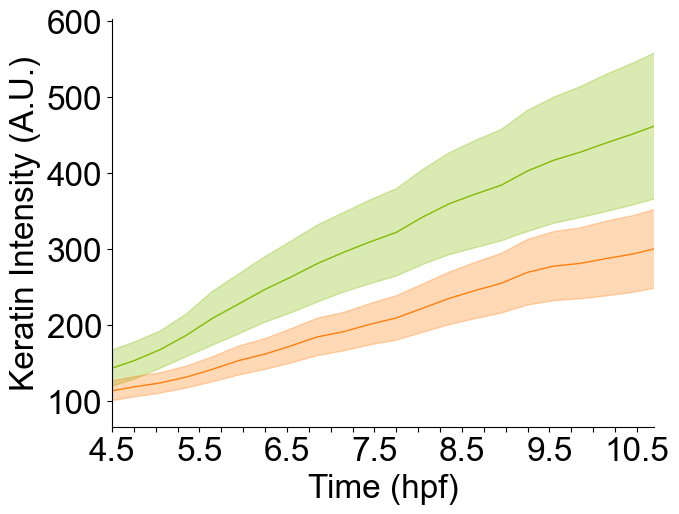

In [65]:
binnedIntensityData
myptysklcols=[col for col in binnedIntensityData.columns if 'MyptYSL' in col]
controlcols=[col for col in binnedIntensityData.columns if 'Control' in col]
#plot the average of columns 1: data in binnedIntensityData dataframe as a line plot with error bars as a ribbon around the line
fig, ax = plt.subplots(figsize=(7, 5.3))
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
ax.set_xlabel("Time (hpf)")
ax.set_ylabel("Keratin Intensity (A.U.)")
ax.set_xlim(4.5,10.7)
ax.set_xticks(np.arange(4.5,10.7,0.25))
ax.set_xticklabels([ "4.5","","","","5.5","","","","6.5","","","","7.5","","", "","8.5","","","","9.5","","","","10.5"],)

plt.plot(binnedIntensityData['Time (hpf)'], binnedIntensityData[controlcols].mean(axis=1),color="#83bb03",linewidth=1, label='Control')
plt.fill_between(binnedIntensityData['Time (hpf)'], binnedIntensityData[controlcols].mean(axis=1) - binnedIntensityData[controlcols].sem(axis=1), binnedIntensityData[controlcols].mean(axis=1) + binnedIntensityData[controlcols].sem(axis=1),color="#83bb03",alpha=0.3)
plt.plot(binnedIntensityData['Time (hpf)'], binnedIntensityData[myptysklcols].mean(axis=1), label='Mypt YSL',color="#ff7f0e",linewidth=1)
plt.fill_between(binnedIntensityData['Time (hpf)'], binnedIntensityData[myptysklcols].mean(axis=1) - binnedIntensityData[myptysklcols].sem(axis=1), binnedIntensityData[myptysklcols].mean(axis=1) + binnedIntensityData[myptysklcols].sem(axis=1),color="#ff7f0e",alpha=0.3)

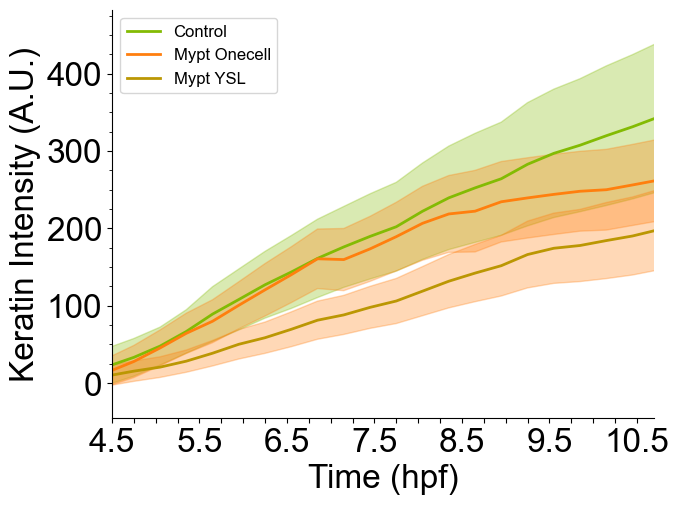

In [66]:
#plot the average of columns 1: data in binnedIntensityData dataframe as a line plot with error bars as a ribbon around the line
fig, ax = plt.subplots(figsize=(7, 5.3))
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
ax.set_xlabel("Time (hpf)")
ax.set_ylabel("Keratin Intensity (A.U.)")
ax.set_xlim(4.5,10.7)
ax.set_xticks(np.arange(4.5,10.7,0.25))
ax.set_xticklabels([ "4.5","","","","5.5","","","","6.5","","","","7.5","","", "","8.5","","","","9.5","","","","10.5"],)
#ax.set_ylim(0,600)
ax.set_yticks(np.arange(0,600,25),minor=True)

# Group the columns by their label and calculate the mean for each group
control_cols = [col for col in binnedIntensityData.columns if 'Control' in col]
mypt_cols = [col for col in binnedIntensityData.columns if 'MyptOne' in col]
myptysl_cols = [col for col in binnedIntensityData.columns if 'MyptYSL' in col]
control_mean = binnedIntensityData[control_cols].mean(axis=1)
control_mean= [x-control_mean.iloc[0] for x in control_mean]
control_std = binnedIntensityData[control_cols].sem(axis=1)
mypt_mean = binnedIntensityData[mypt_cols].mean(axis=1)
mypt_mean= [x-mypt_mean.iloc[0] for x in mypt_mean]
mypt_std = binnedIntensityData[mypt_cols].sem(axis=1)
myptysl_mean = binnedIntensityData[myptysl_cols].mean(axis=1)
myptysl_mean= [x-myptysl_mean.iloc[0] for x in myptysl_mean]
myptysl_std = binnedIntensityData[myptysl_cols].sem(axis=1)

# Create a scatter plot of the control data
plt.plot(binnedIntensityData['Time (hpf)'], control_mean,color="#83bb03",linewidth=2, label='Control')
plt.fill_between(binnedIntensityData['Time (hpf)'], control_mean - control_std, control_mean + control_std,color="#83bb03",alpha=0.3)
# Create a line plot of the mypt data
plt.plot(binnedIntensityData['Time (hpf)'], mypt_mean, label='Mypt Onecell',color="#ff7f0e",linewidth=2)
plt.fill_between(binnedIntensityData['Time (hpf)'], mypt_mean - mypt_std, mypt_mean + mypt_std,color="#ff7f0e",alpha=0.3)
# Create a line plot of the mypt ysl data
plt.plot(binnedIntensityData['Time (hpf)'], myptysl_mean, label='Mypt YSL',color="#BB9703",linewidth=2)
plt.fill_between(binnedIntensityData['Time (hpf)'], myptysl_mean - myptysl_std, myptysl_mean + myptysl_std,color="#ff7f0e",alpha=0.3)

plt.legend(fontsize=12)
plt.savefig(savefolder+"MyptIntensityTotal_OnecellYSL.png",dpi=300,bbox_inches='tight',transparent=True)
plt.savefig(savefolder+"MyptIntensityTotal_OnecellYSL.svg",dpi=300,bbox_inches='tight',transparent=True)
plt.savefig(savefolder+"MyptIntensityTotal_OnecellYSL.pdf",dpi=300,bbox_inches='tight',transparent=True)
# Show the plot
plt.show()

### Figure 2 F caRhoA injected embryo partial analysis

In [67]:
foldercaRhoA1="H:\\PHD_data\\Imaging_et_analysis\\Sp8Imaging\\2023\\09_Sept\\06092023\\KeratinIntensity\\"
foldercaRhoA2="H:/PHD_data/Imaging_et_analysis/Sp8Imaging/2023/04_Apr/04042023_CaRhoA/KeratinIntensity/"
foldercaRhoA3="H:\\PHD_data\\Imaging_et_analysis\\Sp8Imaging\\2023\\10_Oct\\30102023_CaRhoAgood\\KeratinIntensity\\"
caRhoAfiles=glob(foldercaRhoA1+"*.csv")
caRhoAfiles=caRhoAfiles+glob(foldercaRhoA2+"*.csv")
caRhoAfiles=caRhoAfiles+glob(foldercaRhoA3+"*.csv")
caRhoindex=[x for x in caRhoAfiles if x.find("caRhoA")>1]
print(f"There are {len(caRhoAfiles)} embryos in the figur with {len(caRhoindex)} caRhoa and 3 control embryos") 

There are 11 embryos in the figur with 6 caRhoa and 3 control embryos


In [68]:
caRhoAfiles

['H:\\PHD_data\\Imaging_et_analysis\\Sp8Imaging\\2023\\09_Sept\\06092023\\KeratinIntensity\\Results_06092023_Pos006_caRhoA.csv',
 'H:\\PHD_data\\Imaging_et_analysis\\Sp8Imaging\\2023\\09_Sept\\06092023\\KeratinIntensity\\Results_06092023_Pos007_caRhoA.csv',
 'H:\\PHD_data\\Imaging_et_analysis\\Sp8Imaging\\2023\\09_Sept\\06092023\\KeratinIntensity\\Results_06092023_Pos008_control.csv',
 'H:\\PHD_data\\Imaging_et_analysis\\Sp8Imaging\\2023\\09_Sept\\06092023\\KeratinIntensity\\Results_06092023_Pos009_control.csv',
 'H:/PHD_data/Imaging_et_analysis/Sp8Imaging/2023/04_Apr/04042023_CaRhoA/KeratinIntensity\\Results_04042023caRhoAYslInj_Pos003_caRhoA.csv',
 'H:/PHD_data/Imaging_et_analysis/Sp8Imaging/2023/04_Apr/04042023_CaRhoA/KeratinIntensity\\Results_04042023controlj_Pos002_control.csv',
 'H:/PHD_data/Imaging_et_analysis/Sp8Imaging/2023/04_Apr/04042023_CaRhoA/KeratinIntensity\\Results_04042023caRhoAYslInj_Pos005_caRhoA.csv',
 'H:/PHD_data/Imaging_et_analysis/Sp8Imaging/2023/04_Apr/04042023

In [69]:
caRhoAintensityData=pd.DataFrame()
binnedIntensitycaRhoAData=pd.DataFrame()
bin_edges= np.arange(4,12.7,0.3)

# Compute the bin averages
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
bin_averages = np.zeros(len(bin_centers))

binnedIntensitycaRhoAData["Time (hpf)"]=bin_centers
delT0609=900.53/60
delT0404=878/60/60
delT3010=746.67/3600
for file in caRhoAfiles:
    if file.find("06092023")>-1:
        if file.find("ontrol.csv")>-1:
            data = pd.read_csv(file)
            data["Label"]="06092023_Control"+file.split("Pos")[1][0:3]
            data["Time"]=[(x-1)*delT0609/60+4 for x in data[" "]]
            caRhoAintensityData = pd.concat([caRhoAintensityData,data])
            for i in range(len(bin_centers)):
                bin_averages[i] = np.nanmean(data["Mean"][(data["Time"]>=bin_edges[i]) & (data["Time"]<=bin_edges[i+1])])
            binnedIntensitycaRhoAData["06092023_Control"+file.split("Pos")[1][0:3]]=bin_averages
    if file.find("06092023")>-1:
        if file.find("caRhoA.csv")>-1:
            data = pd.read_csv(file)
            data["Label"]="06092023_CaRhoA"+file.split("Pos")[1][0:3]
            data["Time"]=[(x-1)*delT0609/60+4 for x in data[" "]]
            caRhoAintensityData = pd.concat([caRhoAintensityData,data])
            for i in range(len(bin_centers)):
                bin_averages[i] = np.nanmean(data["Mean"][(data["Time"]>=bin_edges[i]) & (data["Time"]<=bin_edges[i+1])])
            binnedIntensitycaRhoAData["06092023_CaRhoA"+file.split("Pos")[1][0:3]]=bin_averages
    if file.find("04042023")>-1:
        if file.find("ontrol.csv")>-1:
            data = pd.read_csv(file)
            data["Label"]="04042023_Control"+file.split("Pos")[1][0:3]
            data["Time"]=[(x-1)*delT0404+4 for x in data[" "]]
            caRhoAintensityData = pd.concat([caRhoAintensityData,data])
            for i in range(len(bin_centers)):
                bin_averages[i] = np.nanmean(data["Mean"][(data["Time"]>=bin_edges[i]) & (data["Time"]<=bin_edges[i+1])])
            binnedIntensitycaRhoAData["04042023_Control"+file.split("Pos")[1][0:3]]=bin_averages
        if file.find("caRhoA.csv")>-1:
            data = pd.read_csv(file)
            data["Label"]="04042023_CaRhoA"+file.split("Pos")[1][0:3]
            data["Time"]=[(x-1)*delT0404+4 for x in data[" "]]
            caRhoAintensityData = pd.concat([caRhoAintensityData,data])
            for i in range(len(bin_centers)):
                bin_averages[i] = np.nanmean(data["Mean"][(data["Time"]>=bin_edges[i]) & (data["Time"]<=bin_edges[i+1])])
            binnedIntensitycaRhoAData["04042023_CaRhoA"+file.split("Pos")[1][0:3]]=bin_averages
    if file.find("30102023")>-1:
        if file.find("ontrol.csv")>-1:
            data = pd.read_csv(file)
            data["Label"]="30102023_Control"+file.split("Pos")[1][0:3]
            data["Time"]=[(x-1)*delT3010+4 for x in data[" "]]
            caRhoAintensityData = pd.concat([caRhoAintensityData,data])
            for i in range(len(bin_centers)):
                bin_averages[i] = np.nanmean(data["Mean"][(data["Time"]>=bin_edges[i]) & (data["Time"]<=bin_edges[i+1])])
            binnedIntensitycaRhoAData["30102023_Control"+file.split("Pos")[1][0:3]]=bin_averages
        if file.find("caRhoA.csv")>-1:
            data = pd.read_csv(file)
            data["Label"]="30102023_CaRhoA"+file.split("Pos")[1][0:3]
            data["Time"]=[(x-1)*delT3010+4 for x in data[" "]]
            caRhoAintensityData = pd.concat([caRhoAintensityData,data])
            for i in range(len(bin_centers)):
                bin_averages[i] = np.nanmean(data["Mean"][(data["Time"]>=bin_edges[i]) & (data["Time"]<=bin_edges[i+1])])
            binnedIntensitycaRhoAData["30102023_CaRhoA"+file.split("Pos")[1][0:3]]=bin_averages
savefolder="H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure2/KeratinIntensityMyptCaRhoA/"

binnedIntensitycaRhoAData.to_csv(savefolder+"caRhoAIntensity.csv")

C:\Users\snaik\AppData\Local\Temp\ipykernel_27652\1442956066.py:30: RuntimeWarning: Mean of empty slice
  bin_averages[i] = np.nanmean(data["Mean"][(data["Time"]>=bin_edges[i]) & (data["Time"]<=bin_edges[i+1])])
C:\Users\snaik\AppData\Local\Temp\ipykernel_27652\1442956066.py:30: RuntimeWarning: Mean of empty slice
  bin_averages[i] = np.nanmean(data["Mean"][(data["Time"]>=bin_edges[i]) & (data["Time"]<=bin_edges[i+1])])
C:\Users\snaik\AppData\Local\Temp\ipykernel_27652\1442956066.py:47: RuntimeWarning: Mean of empty slice
  bin_averages[i] = np.nanmean(data["Mean"][(data["Time"]>=bin_edges[i]) & (data["Time"]<=bin_edges[i+1])])
C:\Users\snaik\AppData\Local\Temp\ipykernel_27652\1442956066.py:64: RuntimeWarning: Mean of empty slice
  bin_averages[i] = np.nanmean(data["Mean"][(data["Time"]>=bin_edges[i]) & (data["Time"]<=bin_edges[i+1])])
C:\Users\snaik\AppData\Local\Temp\ipykernel_27652\1442956066.py:56: RuntimeWarning: Mean of empty slice
  bin_averages[i] = np.nanmean(data["Mean"][(dat

In [70]:
binnedIntensitycaRhoAData

,Time (hpf),06092023_CaRhoA006,06092023_CaRhoA007,06092023_Control008,06092023_Control009,04042023_CaRhoA003,04042023_Control002,04042023_CaRhoA005,04042023_CaRhoA004,30102023_CaRhoA004,30102023_Control002,30102023_Control001
0,4.15,39.2940,42.8815,44.0100,28.9460,182.9400,77.8320,252.4765,275.4475,144.4690,184.8090,83.8495
1,4.45,42.6880,48.6500,52.2850,32.9290,193.9700,100.2510,244.2760,254.7910,158.6260,199.9050,87.1210
2,4.75,46.1730,52.4950,61.0560,37.1900,197.6050,115.3320,233.4210,258.3610,177.0520,215.9870,91.8955
3,5.05,50.4400,56.8930,70.0790,42.5650,200.8560,128.0170,238.3100,258.4210,200.3320,233.2200,98.3340
4,5.35,55.2370,62.0870,81.0750,48.1780,209.1785,144.6155,245.6315,265.6150,227.0355,251.5325,106.6260
5,5.65,63.9760,71.5800,96.6260,57.4040,224.8830,165.7770,258.4800,279.2570,255.1010,269.9690,114.2770
6,5.95,73.1930,82.2630,113.7100,68.5870,234.9450,184.8460,270.8260,288.7260,285.7090,288.2380,122.8200
7,6.25,79.3430,90.6410,124.8840,76.3540,254.6790,201.0600,283.2750,292.1200,315.9290,306.1810,132.7970
8,6.55,86.0230,98.2620,135.3300,84.3100,268.4935,223.4315,309.4150,345.7065,343.8730,322.6310,143.3805
9,6.85,93.6830,107.6270,145.7120,92.1700,293.2210,249.3650,341.4220,NaN,367.4020,336.7390,153.9090


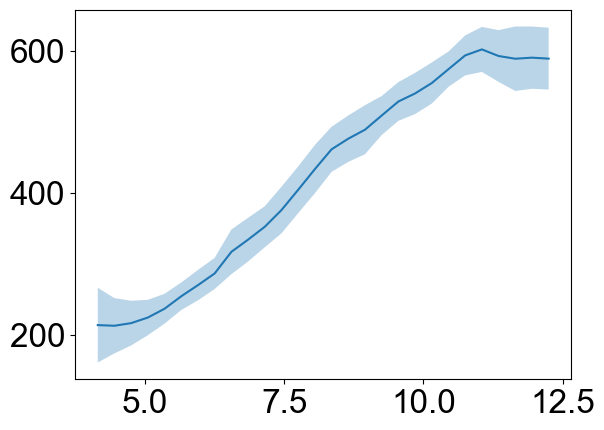

In [71]:
control_cols = [col for col in binnedIntensitycaRhoAData.columns if 'Control' in col]
carhoA_cols = [col for col in binnedIntensitycaRhoAData.columns if 'CaRhoA' in col]
carhoamean=np.nanmean(binnedIntensitycaRhoAData[carhoA_cols[2:]],axis=1)
plt.plot(binnedIntensitycaRhoAData['Time (hpf)'],carhoamean)
plt.fill_between(binnedIntensitycaRhoAData['Time (hpf)'], carhoamean - np.nanstd(binnedIntensitycaRhoAData[carhoA_cols[2:]],axis=1), carhoamean + np.nanstd(binnedIntensitycaRhoAData[carhoA_cols[2:]],axis=1),alpha=0.3)

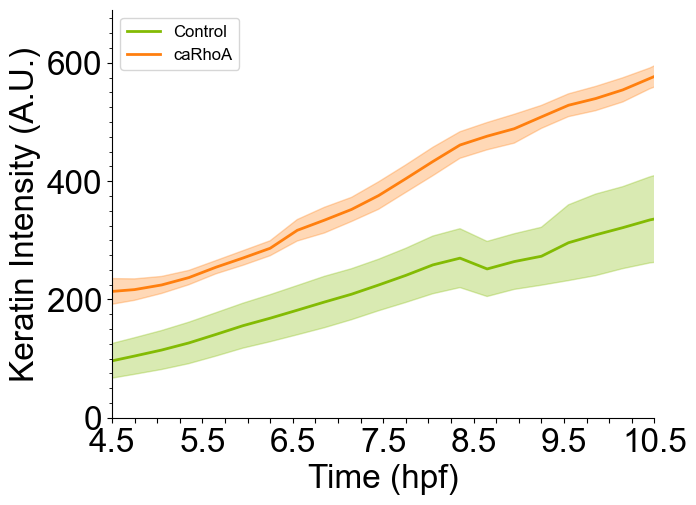

In [72]:
#plot the average of columns 1: data in binnedIntensityData dataframe as a line plot with error bars as a ribbon around the line
fig, ax = plt.subplots(figsize=(7, 5.3))
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
ax.set_xlabel("Time (hpf)")
ax.set_ylabel("Keratin Intensity (A.U.)")
ax.set_xlim(4.5,8.7)
ax.set_xticks(np.arange(4.5,10.7,0.25))
ax.set_xticklabels([ "4.5","","","","5.5","","","","6.5","","","","7.5","","", "","8.5","","","","9.5","","","","10.5"],)
ax.set_ylim(0,690)
ax.set_yticks(np.arange(0,690,25),minor=True)


# Group the columns by their label and calculate the mean for each group
control_cols = [col for col in binnedIntensitycaRhoAData.columns if 'Control' in col]
carhoA_cols = [col for col in binnedIntensitycaRhoAData.columns if 'CaRhoA' in col]
control_mean = binnedIntensitycaRhoAData[control_cols].mean(axis=1)
#control_mean= [x-control_mean.iloc[0] for x in control_mean]
control_std = binnedIntensitycaRhoAData[control_cols].sem(axis=1)
carhoA_mean = binnedIntensitycaRhoAData[carhoA_cols[2:]].mean(axis=1)
#carhoA_mean= [x-carhoA_mean.iloc[0] for x in carhoA_mean]
carhoA_std = binnedIntensitycaRhoAData[carhoA_cols[2:]].sem(axis=1)

# Create a scatter plot of the control data
plt.plot(binnedIntensitycaRhoAData['Time (hpf)'], control_mean,color="#83bb03",linewidth=2, label='Control')
plt.fill_between(binnedIntensitycaRhoAData['Time (hpf)'], control_mean - control_std, control_mean + control_std,color="#83bb03",alpha=0.3)
# Create a line plot of the mypt data
plt.plot(binnedIntensitycaRhoAData['Time (hpf)'], carhoA_mean, label='caRhoA',color="#ff7f0e",linewidth=2) 
plt.fill_between(binnedIntensitycaRhoAData['Time (hpf)'], carhoA_mean - carhoA_std, carhoA_mean + carhoA_std,color="#ff7f0e",alpha=0.3)

plt.legend(fontsize=12)
#plt.savefig(savefolder+"caRhoAIntensity.png",dpi=300,bbox_inches='tight',transparent=True)
#plt.savefig(savefolder+"caRhoAIntensity.svg",dpi=300,bbox_inches='tight',transparent=True)
#plt.savefig(savefolder+"caRhoAIntensity.pdf",dpi=300,bbox_inches='tight',transparent=True)
# Show the plot
plt.show()

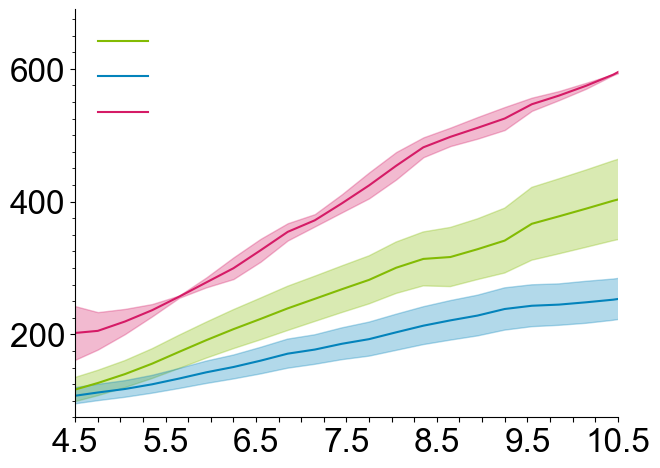

In [76]:
Intfile="H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure2/KeratinIntensityMyptCaRhoA/ResKrtInt_MyptYSLcaRhoA.xlsx"
savefolder="H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure2/KeratinIntensityMyptCaRhoA/"
intYSLRhMypdata=pd.read_excel(Intfile)
#Mypt YSL and caRhoA plot 
fig, ax = plt.subplots(figsize=(7, 5.3))
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
#ax.set_xlabel("Time (hpf)")
#ax.set_ylabel("Keratin Intensity (A.U.)")
ax.set_xlim(4.5,8.7)
ax.set_xticks(np.arange(4.5,10.7,0.25))
ax.set_xticklabels([ "4.5","","","","5.5","","","","6.5","","","","7.5","","", "","8.5","","","","9.5","","","","10.5"],)
ax.set_ylim(75,690)
ax.set_yticks(np.arange(75,690,25),minor=True)
control_cols = [col for col in intYSLRhMypdata.columns if 'Control' in col]
caRhoAcols=[col for col in intYSLRhMypdata.columns if 'CaRhoA' in col]
myptysl_cols = [col for col in intYSLRhMypdata.columns if 'MyptYSL' in col]
controlmean=np.nanmean(intYSLRhMypdata[control_cols],axis=1)
myptyslmean=np.nanmean(intYSLRhMypdata[myptysl_cols],axis=1)
caRhoAmean=np.nanmean(intYSLRhMypdata[caRhoAcols[2:]],axis=1)
plt.plot(intYSLRhMypdata['Time (hpf)'],controlmean,color="#83bb03",label='    ')
plt.fill_between(intYSLRhMypdata['Time (hpf)'], controlmean - intYSLRhMypdata[control_cols].sem(axis=1), controlmean + intYSLRhMypdata[control_cols].sem(axis=1),color="#83bb03",alpha=0.3)
plt.plot(intYSLRhMypdata['Time (hpf)'],myptyslmean,color="#0383bb",label='         ')
plt.fill_between(intYSLRhMypdata['Time (hpf)'], myptyslmean - intYSLRhMypdata[myptysl_cols].sem(axis=1), myptyslmean + intYSLRhMypdata[myptysl_cols].sem(axis=1),color="#0383bb",alpha=0.3)
plt.plot(intYSLRhMypdata['Time (hpf)'],caRhoAmean,color="#D51B66",label="     ")
plt.fill_between(intYSLRhMypdata['Time (hpf)'], caRhoAmean - intYSLRhMypdata[caRhoAcols[2:]].sem(axis=1), caRhoAmean + intYSLRhMypdata[caRhoAcols[2:]].sem(axis=1),color="#D51B66",alpha=0.3)
plt.legend(frameon=False,fontsize=18,loc="upper left")
plt.savefig(savefolder+"MyptYSLcaRhoAIntensity.png",dpi=300,bbox_inches='tight',transparent=True)
plt.savefig(savefolder+"MyptYSLcaRhoAIntensity.svg",dpi=300,bbox_inches='tight',transparent=True)
plt.savefig(savefolder+"MyptYSLcaRhoAIntensity.pdf",dpi=300,bbox_inches='tight',transparent=True)
plt.show()

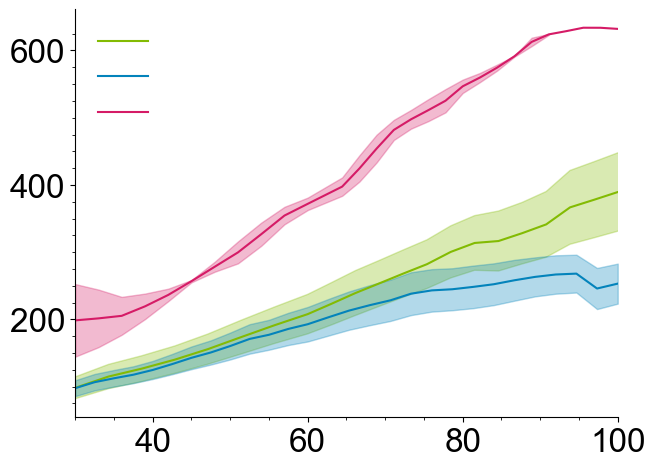

In [77]:
#epiboly timing for mypt and caRhoA intensity
Epibolycontrol=[30,34.28571429,38.57142857,42.85714286,47.14285714,51.42857143,55.71428571, 60, 63.07692308,  66.15384615,  69.23076923,
72.30769231,  75.38461538,  78.46153846,  81.53846154,
84.61538462,  87.69230769,  90.76923077,  93.84615385,
96.92307692, 100., 102.85714286, 105.71428571, 108.57142857,
111.42857143, 114.28571429, 117.14285714, 120.]
Epibolymypt=[30. , 32.5, 35. , 37.5, 40. , 42.5, 45. , 47.5, 50. , 52.5, 55. ,
       57.5, 60.,   62.66666667,  65.33333333,  68.        ,
        70.66666667,  73.33333333,  76.        ,  78.66666667,
        81.33333333,  84.        ,  86.66666667,  89.33333333,
        92.        ,  94.66666667,  97.33333333, 100.]
EpibolycaRhoA=[30., 33., 36., 39., 42., 45., 48., 51., 54., 57., 60.,  64.44444444,  66.66666667,
        68.88888889,  71.11111111,  73.33333333,  75.55555556,
        77.77777778,  80.        ,  82.22222222,  84.44444444,
        86.66666667,  88.88888889,  91.11111111,  93.33333333,
        95.55555556,  97.77777778, 100.]


#Mypt YSL and caRhoA plot 
fig, ax = plt.subplots(figsize=(7, 5.3))
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
ax.set_xticks(np.arange(30,110,5),minor=True)
ax.set_yticks(np.arange(75,650,25),minor=True)
ax.set_xlim(30,100)
plt.plot(Epibolycontrol,controlmean,color="#83bb03",label='    ')
plt.fill_between(Epibolycontrol, controlmean - intYSLRhMypdata[control_cols].sem(axis=1), controlmean + intYSLRhMypdata[control_cols].sem(axis=1),color="#83bb03",alpha=0.3)
plt.plot(Epibolymypt,myptyslmean,color="#0383bb",label='         ')
plt.fill_between(Epibolymypt, myptyslmean - intYSLRhMypdata[myptysl_cols].sem(axis=1), myptyslmean + intYSLRhMypdata[myptysl_cols].sem(axis=1),color="#0383bb",alpha=0.3)
plt.plot(EpibolycaRhoA,caRhoAmean,color="#D51B66",label="     ")
plt.fill_between(EpibolycaRhoA, caRhoAmean - intYSLRhMypdata[caRhoAcols[2:]].sem(axis=1), caRhoAmean + intYSLRhMypdata[caRhoAcols[2:]].sem(axis=1),color="#D51B66",alpha=0.3)
plt.legend(frameon=False,fontsize=18,loc="best")
plt.savefig(savefolder+"MyptYSLcaRhoAIntensityEpibolyprog.png",dpi=300,bbox_inches='tight',transparent=True)
plt.savefig(savefolder+"MyptYSLcaRhoAIntensityEpibolyprog.svg",dpi=300,bbox_inches='tight',transparent=True)
plt.savefig(savefolder+"MyptYSLcaRhoAIntensityEpibolyprog.pdf",dpi=300,bbox_inches='tight',transparent=True)
plt.show()

In [78]:
#Network density plots for the mypt and caRhoA embryos 
ndFolder= "H:\\PHD_data\\Imaging_et_analysis\\NikSD\\2023\\02_Feb\\14022023_Mypt\\NetworkAnalysis_Mypt\\"

#files for networkdensity plots
controlndfiles1=glob(ndFolder+"*Pos01*.csv")
MyptOnecellfiles1=glob(ndFolder+"*Pos00*.csv")
print("There are {} embryos and {} experiments in the figure".format(len(controlndfiles1),len(MyptOnecellfiles1)))
print(controlndfiles1[0])

There are 11 embryos and 11 experiments in the figure
H:\PHD_data\Imaging_et_analysis\NikSD\2023\02_Feb\14022023_Mypt\NetworkAnalysis_Mypt\ResultsNetworkAnalysis_Mypt_Pos01_14022023_TS001.csv


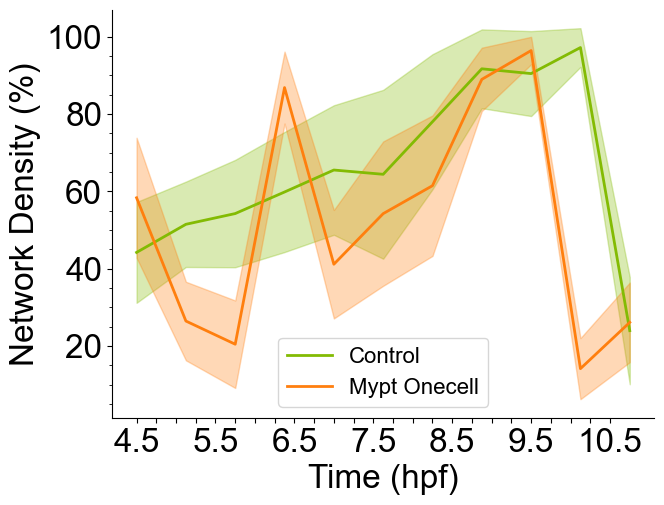

In [79]:
ndvaluesControl=[]
ndvaluesControlstd=[]
ndvaluesMypt=[]
ndvaluesMyptstd=[]
for iter,file in enumerate(controlndfiles1):
    data=pd.read_csv(file)
    ndvaluesControl.append(data["%Area"].mean())
    ndvaluesControlstd.append(data["%Area"].std())
for iter,file in enumerate(MyptOnecellfiles1):
    data=pd.read_csv(file)
    ndvaluesMypt.append(data["%Area"].mean())
    ndvaluesMyptstd.append(data["%Area"].std())
fig,ax=plt.subplots(figsize=(7, 5.3))
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.xlabel("Time (hpf)")
plt.ylabel("Network Density (%)")
ax.set_xticks(np.arange(0,10,0.4))
ax.set_xticklabels([ "4.5","","","","5.5","","","","6.5","","","","7.5","","", "","8.5","","","","9.5","","","","10.5"])
ax.set_yticks(np.arange(0,105,5),minor=True)
plt.plot(ndvaluesControl,color="#83bb03",linewidth=2, label='Control')
plt.fill_between(range(len(ndvaluesControl)),np.array(ndvaluesControl)-np.array(ndvaluesControlstd),np.array(ndvaluesControl)+np.array(ndvaluesControlstd),alpha=0.3,color="#83bb03")
plt.plot(ndvaluesMypt, label='Mypt Onecell',color="#ff7f0e",linewidth=2)
plt.fill_between(range(len(ndvaluesMypt)),np.array(ndvaluesMypt)-np.array(ndvaluesMyptstd),np.array(ndvaluesMypt)+np.array(ndvaluesMyptstd),alpha=0.3,color="#ff7f0e")
plt.legend(fontsize=16)
outputfolder="H:\\PHD_data\\Imaging_et_analysis\\PaperFigures\\Figure2\\NetworkDensity\\"
if not os.path.exists(outputfolder):
    os.makedirs(outputfolder)
#plt.savefig(outputfolder+"NetworkDensityMypt.png",dpi=300,bbox_inches='tight',transparent=True)
#plt.savefig(outputfolder+"NetworkDensityMypt.svg",dpi=300,bbox_inches='tight',transparent=True)
#plt.savefig(outputfolder+"NetworkDensityMypt.pdf",dpi=300,bbox_inches='tight',transparent=True)
plt.show()

In [80]:
#nd new plot
ndfolder1mypt="H:/PHD_data/Imaging_et_analysis/NikSD/2023/02_Feb/14022023_Mypt/NetworkAnalysis_Mypt/"
#todo : add the other folders
ndfolder2mypt="H:/PHD_data/Imaging_et_analysis/NikSD/2022/01-Jan/18012022_Mypt/"

pos0files=sorted(glob(ndfolder1mypt+"*Pos00*.csv"))
pos1files=glob(ndfolder1mypt+"*Pos01*.csv")
def pdmaker(files:list):
    pdname=pd.DataFrame()
    time=np.linspace(4.5,10.5,len(files))
    pdname["Time (hpf)"]=time
    meanND=[]
    meanNDsem=[]
    for iter,file in enumerate(files):
        data=pd.read_csv(file)
        meanND.append(data["%Area"].mean())
        meanNDsem.append(data["%Area"].std())
    pdname["Mean"]=meanND
    pdname["SEM"]=meanNDsem
    return pdname
myptnd=pdmaker(glob(ndfolder2mypt+"/Pos002/NetworkDensity/*.csv"))
timenewfolder=np.linspace(4.5,7.5,len(glob(ndfolder2mypt+"/Pos002/NetworkDensity/*.csv")))
MyptND2=pd.DataFrame()
MyptND2["Time (hpf)"]=timenewfolder
MyptND2["Mean"]=myptnd["Mean"]
MyptND2["SEM"]=myptnd["SEM"]
myptnd=pdmaker(glob(ndfolder2mypt+"/Pos003/NetworkDensity/*.csv"))
MyptND2["Mean2"]=myptnd["Mean"]
MyptND2["SEM2"]=myptnd["SEM"]
MyptND1=pdmaker(pos0files)
MyptND1

,Time (hpf),Mean,SEM
0,4.5,14.113800,7.897133
1,5.1,26.087758,10.295728
2,5.7,26.433818,10.163667
3,6.3,20.435595,11.319855
4,6.9,41.131152,14.028828
5,7.5,58.330767,15.529040
6,8.1,54.223926,18.677481
7,8.7,61.459923,18.174056
8,9.3,88.966960,8.199264
9,9.9,86.843960,9.300891


In [81]:
#binning myptnd
bin_edges= np.arange(4,11.5,0.5)

bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
binnedMyptNetworkData=pd.DataFrame()    
binnedMyptNetworkData["Time (hpf)"]=bin_centers
binavg=[]
binstd=[]
for i in range(len(bin_centers)):
    binavg.append(np.nanmean(MyptND1["Mean"][(MyptND1["Time (hpf)"]>=bin_edges[i]) & (MyptND1["Time (hpf)"]<=bin_edges[i+1])]))
    binstd.append(MyptND1["SEM"][(MyptND1["Time (hpf)"]>=bin_edges[i]) & (MyptND1["Time (hpf)"]<=bin_edges[i+1])].mean())
binnedMyptNetworkData["Mean_14022023"]=binavg
binnedMyptNetworkData["SEM_14022023"]=binstd
binavg=[]
binstd=[]
for i in range(len(bin_centers)):
    binavg.append(np.nanmean(MyptND2["Mean"][(MyptND2["Time (hpf)"]>=bin_edges[i]) & (MyptND2["Time (hpf)"]<=bin_edges[i+1])]))
    binstd.append(np.nanstd(MyptND2["Mean"][(MyptND2["Time (hpf)"]>=bin_edges[i]) & (MyptND2["Time (hpf)"]<=bin_edges[i+1])]))
binnedMyptNetworkData["Mean_18012022"]=binavg
binnedMyptNetworkData["SEM_18012022"]=binstd
binavg=[]
binstd=[]
for i in range(len(bin_centers)):
    binavg.append(np.nanmean(MyptND2["Mean2"][(MyptND2["Time (hpf)"]>=bin_edges[i]) & (MyptND2["Time (hpf)"]<=bin_edges[i+1])]))
    binstd.append(np.nanstd(MyptND2["Mean2"][(MyptND2["Time (hpf)"]>=bin_edges[i]) & (MyptND2["Time (hpf)"]<=bin_edges[i+1])]))
binnedMyptNetworkData["Mean2_18012022"]=binavg
binnedMyptNetworkData["SEM2_18012022"]=binstd
binnedMyptmean=np.nanmean(binnedMyptNetworkData[["Mean_14022023","Mean_18012022","Mean2_18012022"]],axis=1)
binnedMyptstd=np.nanstd(binnedMyptNetworkData[["Mean_14022023","Mean_18012022","Mean2_18012022"]],axis=1)
binnedMyptstd[8:]=binnedMyptNetworkData["SEM_14022023"][8:]

C:\Users\snaik\AppData\Local\Temp\ipykernel_27652\2143254906.py:17: RuntimeWarning: Mean of empty slice
  binavg.append(np.nanmean(MyptND2["Mean"][(MyptND2["Time (hpf)"]>=bin_edges[i]) & (MyptND2["Time (hpf)"]<=bin_edges[i+1])]))
c:\miniforge3\envs\snBase\Lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\snaik\AppData\Local\Temp\ipykernel_27652\2143254906.py:24: RuntimeWarning: Mean of empty slice
  binavg.append(np.nanmean(MyptND2["Mean2"][(MyptND2["Time (hpf)"]>=bin_edges[i]) & (MyptND2["Time (hpf)"]<=bin_edges[i+1])]))
c:\miniforge3\envs\snBase\Lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


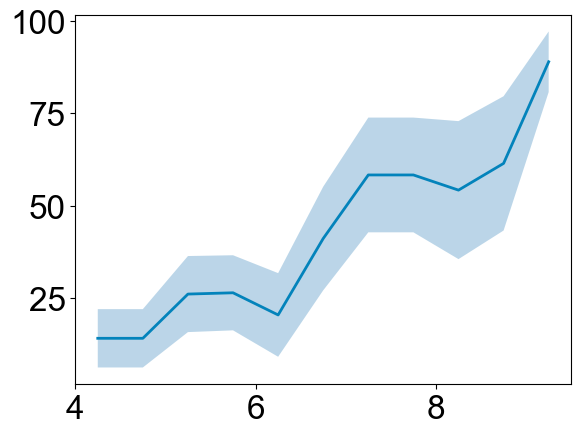

In [82]:
binnedMyptmean=binnedMyptNetworkData["Mean_14022023"]
binnedMyptstd=binnedMyptNetworkData["SEM_14022023"]
plt.plot(binnedMyptNetworkData["Time (hpf)"][:-3],binnedMyptmean[:-3],color="#0383bb",linewidth=2)
plt.fill_between(binnedMyptNetworkData["Time (hpf)"][:-3],binnedMyptmean[:-3]-binnedMyptstd[:-3],binnedMyptmean[:-3]+binnedMyptstd[:-3],alpha=0.3)

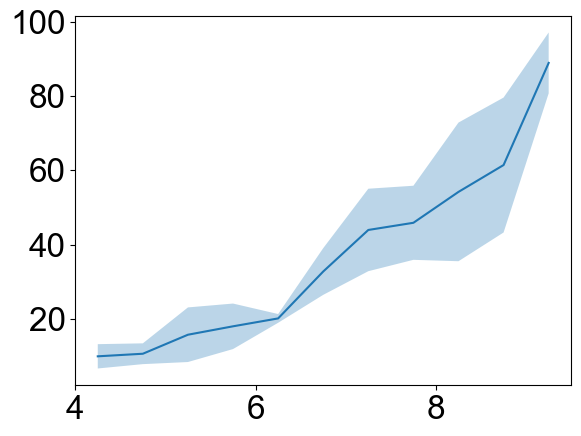

In [83]:
binnedMyptmean=np.nanmean(binnedMyptNetworkData[["Mean_14022023","Mean_18012022","Mean2_18012022"]],axis=1)
binnedMyptstd=np.nanstd(binnedMyptNetworkData[["Mean_14022023","Mean_18012022","Mean2_18012022"]],axis=1)
binnedMyptstd[8:]=binnedMyptNetworkData["SEM_14022023"][8:]
plt.plot(binnedMyptNetworkData["Time (hpf)"][:-3],binnedMyptmean[:-3])
plt.fill_between(binnedMyptNetworkData["Time (hpf)"][:-3],binnedMyptmean[:-3]-binnedMyptstd[:-3],binnedMyptmean[:-3]+binnedMyptstd[:-3],alpha=0.3)

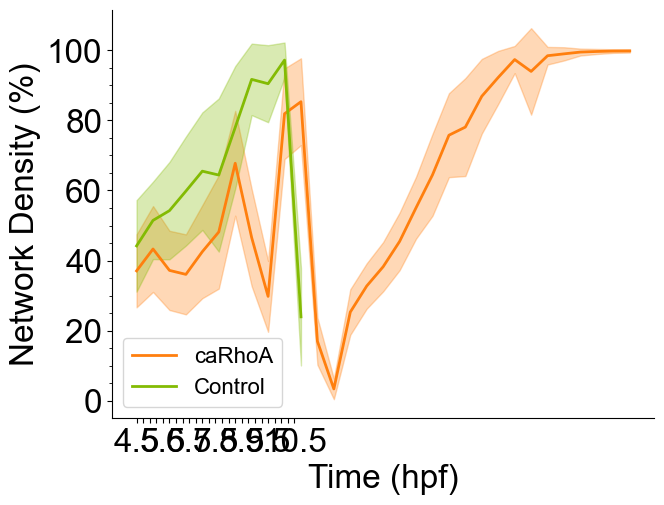

In [84]:
#network density plot for caRhoA embryos
ndcaRhoAfolder="H:\\PHD_data\\Imaging_et_analysis\\NikSD\\2023\\10_Oct\\24102023_caRhoA\\NetworkDensitycaRhoA\\"
caRhoAfiles=glob(ndcaRhoAfolder+"*Pos02*.csv")

ndvaluescaRhoA=[]
ndvaluescaRhoAstd=[]
for iter,file in enumerate(caRhoAfiles):
    data=pd.read_csv(file)
    ndvaluescaRhoA.append(data["%Area"].mean())
    ndvaluescaRhoAstd.append(data["%Area"].std())
fig,ax=plt.subplots(figsize=(7, 5.3))
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
plt.xlabel("Time (hpf)")
plt.ylabel("Network Density (%)")
ax.set_xticks(np.arange(0,10,0.4))
ax.set_xticklabels([ "4.5","","","","5.5","","","","6.5","","","","7.5","","", "","8.5","","","","9.5","","","","10.5"])
ax.set_yticks(np.arange(0,105,5),minor=True)
plt.plot(ndvaluescaRhoA,color="#ff7f0e",linewidth=2, label='caRhoA')
plt.fill_between(range(len(ndvaluescaRhoA)),np.array(ndvaluescaRhoA)-np.array(ndvaluescaRhoAstd),np.array(ndvaluescaRhoA)+np.array(ndvaluescaRhoAstd),alpha=0.3,color="#ff7f0e")
plt.plot(ndvaluesControl,color="#83bb03",linewidth=2, label='Control')
plt.fill_between(range(len(ndvaluesControl)),np.array(ndvaluesControl)-np.array(ndvaluesControlstd),np.array(ndvaluesControl)+np.array(ndvaluesControlstd),alpha=0.3,color="#83bb03")
plt.legend(fontsize=16)
outputfolder="H:\\PHD_data\\Imaging_et_analysis\\PaperFigures\\Figure2\\NetworkDensity\\"
if not os.path.exists(outputfolder):
    os.makedirs(outputfolder)

plt.savefig(outputfolder+"NetworkDensitycaRhoA.png",dpi=300,bbox_inches='tight',transparent=True)
plt.savefig(outputfolder+"NetworkDensitycaRhoA.svg",dpi=300,bbox_inches='tight',transparent=True)
plt.savefig(outputfolder+"NetworkDensitycaRhoA.pdf",dpi=300,bbox_inches='tight',transparent=True)

,Time (hpf),30102023_caRhoANDmean_pos002,30102023_caRhoANDstd_pos002,30102023_caRhoANDmean_pos003,30102023_caRhoANDstd_pos003
0,4.500000,30.629000,9.776475,39.101919,9.615089
1,4.621212,38.612357,12.599593,39.516622,9.984201
2,4.742424,37.640037,13.000977,41.491279,9.860241
3,4.863636,38.743731,12.815357,43.790756,10.544713
4,4.984848,44.376538,11.634772,47.706718,11.066230
5,5.106061,45.746154,10.861972,49.819912,11.328952
6,5.227273,50.989826,11.160120,51.079943,10.671371
7,5.348485,51.007042,11.071605,54.652051,11.440335
8,5.469697,54.624357,12.511799,54.753100,12.017724
9,5.590909,58.167500,12.531870,56.752622,12.123854


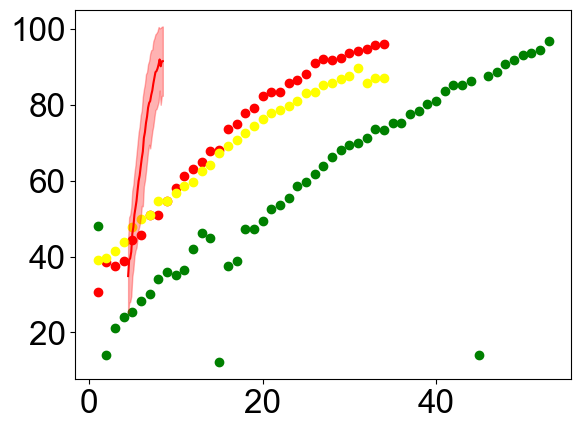

In [85]:
ndfolder1carhoa="H:/PHD_data/Imaging_et_analysis/NikSD/2023/10_Oct/30102023_caRhoA/NetworkDensityAnalysis/"
carhoa1files=glob(ndfolder1carhoa+"*1/*.csv")
carhoa2files=glob(ndfolder1carhoa+"*2/*.csv")
carhoa3files=glob(ndfolder1carhoa+"*3/*.csv")
carhoaND=pd.DataFrame()
carhoaND["Time (hpf)"]=np.linspace(4.5,8.5,len(carhoa2files))
plt.figure()
i=0
for file in carhoa1files:
    i+=1
    data=pd.read_csv(file)
    plt.scatter(i,data["%Area"].mean(),color="green")
plt.Figure()
i=0
meannd2=[]
meannd2std=[]
for file in carhoa2files:
    i+=1
    data=pd.read_csv(file)
    plt.scatter(i,data["%Area"].mean(),color="red")
    meannd2.append(data["%Area"].mean())
    meannd2std.append(data["%Area"].std())
carhoaND["30102023_caRhoANDmean_pos002"]=meannd2
carhoaND["30102023_caRhoANDstd_pos002"]=meannd2std

plt.Figure()
i=0
meannd3=[]
meannd3std=[]
for file in carhoa3files:
    i+=1
    data=pd.read_csv(file)
    plt.scatter(i,data["%Area"].mean(),color="yellow")
    meannd3.append(data["%Area"].mean())
    meannd3std.append(data["%Area"].std())
carhoaND["30102023_caRhoANDmean_pos003"]=meannd3
carhoaND["30102023_caRhoANDstd_pos003"]=meannd3std
plt.plot(carhoaND["Time (hpf)"],carhoaND[["30102023_caRhoANDmean_pos002","30102023_caRhoANDmean_pos003"]].mean(axis=1),color="red")
plt.fill_between(carhoaND["Time (hpf)"],carhoaND[["30102023_caRhoANDmean_pos002","30102023_caRhoANDmean_pos003"]].mean(axis=1)-carhoaND[["30102023_caRhoANDstd_pos002","30102023_caRhoANDstd_pos003"]].mean(axis=1),carhoaND[["30102023_caRhoANDmean_pos002","30102023_caRhoANDmean_pos003"]].mean(axis=1)+carhoaND[["30102023_caRhoANDstd_pos002","30102023_caRhoANDstd_pos003"]].mean(axis=1),alpha=0.3,color="red")
carhoaND

C:\Users\snaik\AppData\Local\Temp\ipykernel_27652\3710549693.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([ "4.5","","","","5.5","","","","6.5","","","","7.5","","", "","8.5","","","","9.5","","","","10.5"],)


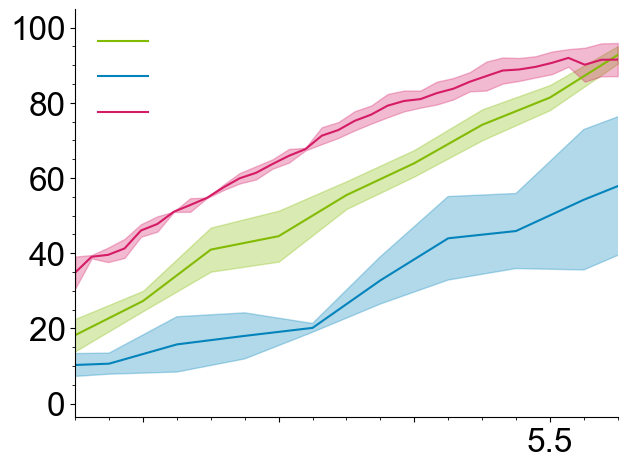

In [89]:
#plot of network density for mypt and caRhoA embryos new set of data
controlfile="H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure1/NetworkDensity/NetworkDensityData_3_16042024.csv"
controlpd=pd.read_csv(controlfile)
controlndcols=[col for col in controlpd.columns if 'Density' in col[-len("density"):]]

controlmean=np.nanmean(controlpd[controlndcols][:-2],axis=1)
fig,ax=plt.subplots(figsize=(7, 5.3))
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
ax.set_xticks(np.arange(4.5,10,0.25),minor=True)
ax.set_xticklabels([ "4.5","","","","5.5","","","","6.5","","","","7.5","","", "","8.5","","","","9.5","","","","10.5"],)
ax.set_xlim(4.5,8.5)
ax.set_yticks(np.arange(0,105,5),minor=True)
plt.plot(controlpd["Time (hpf)"][:-2],controlmean,label="   ",color="#83bb03")
plt.fill_between(controlpd["Time (hpf)"][:-2],controlmean-controlpd[controlndcols][:-2].sem(axis=1),controlmean+controlpd[controlndcols][:-2].sem(axis=1),alpha=0.3,color="#83bb03")

plt.plot(binnedMyptNetworkData["Time (hpf)"],binnedMyptmean,label="   ",color="#0383bb")

plt.fill_between(binnedMyptNetworkData["Time (hpf)"],binnedMyptmean-binnedMyptstd,binnedMyptmean+binnedMyptstd,alpha=0.3,color="#0383bb")
plt.plot(carhoaND["Time (hpf)"],carhoaND[["30102023_caRhoANDmean_pos002","30102023_caRhoANDmean_pos003"]].mean(axis=1),label="   ",color="#D51B66")
plt.fill_between(carhoaND["Time (hpf)"],carhoaND[["30102023_caRhoANDmean_pos002","30102023_caRhoANDmean_pos003"]].mean(axis=1)-carhoaND[["30102023_caRhoANDmean_pos002","30102023_caRhoANDmean_pos003"]].sem(axis=1),carhoaND[["30102023_caRhoANDmean_pos002","30102023_caRhoANDmean_pos003"]].mean(axis=1)+carhoaND[["30102023_caRhoANDmean_pos002","30102023_caRhoANDmean_pos003"]].sem(axis=1),alpha=0.3,color="#D51B66")
plt.legend(loc="best",frameon=False,fontsize=18)
outputfolder="H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure2/NetworkDensity/"

plt.savefig(outputfolder+"NetworkDensityMyptcaRhoA.png",dpi=300,bbox_inches='tight',transparent=True)
plt.savefig(outputfolder+"NetworkDensityMyptcaRhoA.svg",dpi=300,bbox_inches='tight',transparent=True)
plt.savefig(outputfolder+"NetworkDensityMyptcaRhoA.pdf",dpi=300,bbox_inches='tight',transparent=True)

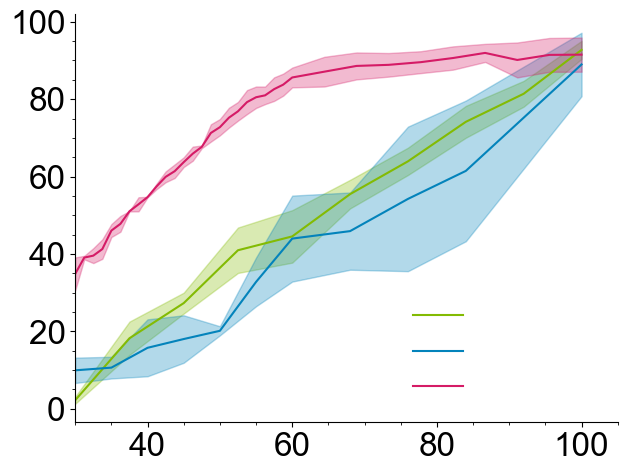

In [93]:
caRhoepi=[30.  , 31.25, 32.5 , 33.75, 35.  , 36.25, 37.5 , 38.75, 40.  ,
       41.25, 42.5 , 43.75, 45.  , 46.25, 47.5 , 48.75, 50.  , 51.25,
       52.5 , 53.75, 55.  , 56.25, 57.5 , 58.75, 60.,  64.44444444,  68.88888889,  73.33333333,
        77.77777778,  82.22222222,  86.66666667,  91.11111111,
        95.55555556, 100.          ]
controlepi=[30. , 37.5, 45. , 52.5, 60. , 68.,  76.,  84.,  92., 100.]
myptepi=[30., 35., 40., 45., 50., 55., 60.,  68.,  76.,  84.,  100.  ]
myptepimean=binnedMyptmean[:-3]
myptepistd=binnedMyptstd[:-3]
Myptepipd=pd.DataFrame({"Epiboly":myptepi,"Mean":myptepimean,"SEM":myptepistd})
carhoaND["epi"]=caRhoepi
Myptepipd.to_csv(outputfolder+"NetworkDensityMypt.csv")
carhoaND.to_csv(outputfolder+"NetworkDensityCaRhoA.csv")
#binnedMyptNetworkData.to_csv(outputfolder+"NetworkDensityMypt.csv")
controlpd["Epiboly"]=controlepi+[0,0]
controlpd.to_csv(outputfolder+"NetworkDensityControl.csv")
fig,ax=plt.subplots(figsize=(7, 5.3))
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
ax.set_yticks(np.arange(0,105,5),minor=True)
ax.set_xlim(30,100)
ax.set_xticks(np.arange(30,110,5),minor=True)
plt.plot(controlepi,controlmean,label="                ",color="#83bb03")
plt.fill_between(controlepi,controlmean-controlpd[controlndcols][:-2].sem(axis=1),controlmean+controlpd[controlndcols][:-2].sem(axis=1),alpha=0.3,color="#83bb03")
plt.plot(myptepi,binnedMyptmean[:-3],label="               ",color="#0383bb")
plt.fill_between(myptepi,binnedMyptmean[:-3]-binnedMyptstd[:-3],binnedMyptmean[:-3]+binnedMyptstd[:-3],alpha=0.3,color="#0383bb")
plt.plot(caRhoepi,carhoaND[["30102023_caRhoANDmean_pos002","30102023_caRhoANDmean_pos003"]].mean(axis=1),label="             ",color="#D51B66")
plt.fill_between(caRhoepi,carhoaND[["30102023_caRhoANDmean_pos002","30102023_caRhoANDmean_pos003"]].mean(axis=1)-carhoaND[["30102023_caRhoANDmean_pos002","30102023_caRhoANDmean_pos003"]].sem(axis=1),carhoaND[["30102023_caRhoANDmean_pos002","30102023_caRhoANDmean_pos003"]].mean(axis=1)+carhoaND[["30102023_caRhoANDmean_pos002","30102023_caRhoANDmean_pos003"]].sem(axis=1),alpha=0.3,color="#D51B66")
plt.legend(loc="lower right",frameon=False,fontsize=18)
plt.savefig(outputfolder+"NetworkDensityMyptcaRhoAepi.png",dpi=300,bbox_inches='tight',transparent=True)
plt.savefig(outputfolder+"NetworkDensityMyptcaRhoAepi.svg",dpi=300,bbox_inches='tight',transparent=True)
plt.savefig(outputfolder+"NetworkDensityMyptcaRhoAepi.pdf",dpi=300,bbox_inches='tight',transparent=True)


In [13]:
np.linspace(60,100,len(binnedMyptNetworkData["Time (hpf)"][6:-2]))

array([ 60.,  68.,  76.,  84.,  92., 100.])

In [14]:
binnedMyptmean[:-2]

array([24.67018357, 25.36506717, 15.86496654, 16.01676067, 42.27822049,
       32.77745398, 42.59963865, 44.53290399, 61.45992308, 88.96696   ,
       96.42524   , 14.1138    ])

# Strain intensity relationship plots for part 2 of figure 2 
## Relationship  between strain and keratin intensity
P1: Box plot of the intensity before and after aspiration in the pipette and a 60um region next to pipette
P2: Strain and intensity line graphs with a fit for the whole data


In [94]:
#All the folders for the data

folder1="H:\\PHD_data\\Imaging_et_analysis\\Sp5imaging\\Pipettes\\11_nov\\26112021\\"
folder2="H:\\PHD_data\\Imaging_et_analysis\\Sp5imaging\\Pipettes\\11_nov\\24112021\\"
folder3="H:\\PHD_data\\Imaging_et_analysis\\Sp5imaging\\Pipettes\\11_nov\\15112021\\"
#File ids for early embryos
earlyfiles=['15112021_Pos002','15112021_Pos004','15112021_Pos006','15112021_Pos008',
            '15112021_Pos010','15112021_Pos012','15112021_Pos014','15112021_Pos016',
            '15112021_Pos018','26112021_Pos010', '26112021_Pos012', '26112021_Pos014',
            '26112021_Pos016', '26112021_Pos018', 
            '26112021_Pos022', '26112021_Pos024', '26112021_Pos026']


In [95]:
def IntensityDatasorting(folders=[folder1,folder2,folder3],earlyfiles=earlyfiles):
    # Initialize variables
    lendata = 0

    # Count the total number of files across all folders
    for folder in folders:
        lendata += len(glob(folder + "\\*\\*Pip*.csv"))

    # Initialize a numpy array to store data
    data=[]
    current_index = 0
    earlyindex=[]
    # Loop through each folder
    for folder in folders:
        # Get a list of Pip and Out files in the current folder
        pipfiles = glob(folder + "\\*\\*Pip*.csv")
        outfiles = glob(folder + "\\*\\*Out*.csv")
        folderdat=np.zeros((5, len(outfiles)), dtype='object')
        idxfd=0
        # Loop through each Pip file
        for pipfile in pipfiles:
            # Extract the position from the Pip file name
            pos = pipfile[pipfile.find("os")-1:pipfile.find("os")+7]
            date=pipfile[pipfile.find("11_nov\\")+7:pipfile.find("11_nov")+15]
            fid=date+"_"+pos[:-2]

            # Find the corresponding Out file
            for outfile in outfiles:
                if pos in outfile:
                    # Read and plot data from Pip file
                    
                    pipdf = pd.read_csv(pipfile, delimiter="[;,,]", engine="python")
                    pipdf = pipdf[1::2].reset_index(drop=True)[10:]
                        
                    # Read and plot data from Out file
                    outdf = pd.read_csv(outfile, delimiter="[;,,]", engine="python")
                    outdf = outdf[1::2].reset_index(drop=True)[10:]
                    pipmax = np.max(pipdf["Mean"])
                    
                    pipmin = np.min(pipdf["Mean"])
                    outmax = np.max(outdf["Mean"])
                    outmin = np.min(outdf["Mean"])
                        
                    # Update data array with current index
                    folderdat[2, idxfd] = pipmax
                    folderdat[1, idxfd] = pipmin
                    folderdat[4, idxfd] = outmax
                    folderdat[3, idxfd] = outmin
                    folderdat[0, idxfd] = fid
                    if fid in earlyfiles:
                        earlyindex.append(current_index)
                    current_index += 1
                    idxfd+=1
        normalIntensity=np.mean(folderdat[3,:])
        folderdat[1:,:]=folderdat[1:,:]#/normalIntensity
        if len(data)==0:
            data=folderdat 
        else:
            data = np.concatenate((data,folderdat), axis=1)
    return data,earlyindex

data,earlyindex=IntensityDatasorting([folder1,folder3])

C:\Users\snaik\AppData\Local\Temp\ipykernel_27652\3290364585.py:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot=plt.boxplot(early_data, positions=x_locations[:4],patch_artist=True,labels=labels[:4])
C:\Users\snaik\AppData\Local\Temp\ipykernel_27652\3290364585.py:22: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bplot2=plt.boxplot(late_data, positions=x_locations[4:],patch_artist=True,labels=labels[4:])


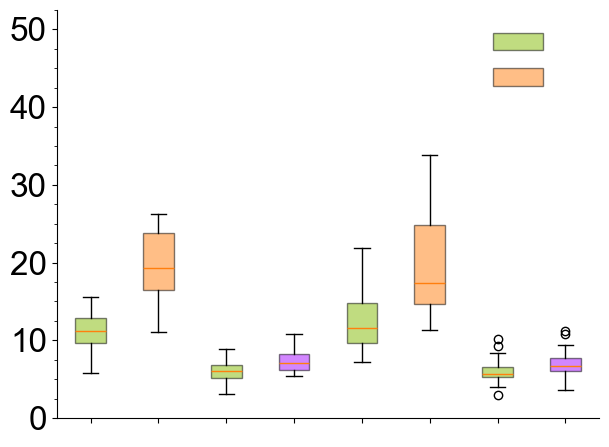

In [96]:
#plotting the box plot of the intensity in data array for early and late embryos in the pipette and outside before and after asporation
fig, ax = plt.subplots(figsize=(7, 5.3), sharey=True)
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')   

# Get the data subsets for lateindex and earlyindex
lateindex = np.invert(np.isin(np.arange(data.shape[1]), earlyindex))
late_data = data[1:, lateindex].T
early_data = data[1:, earlyindex].T


# Create the x locations for the boxplots
x_locations = np.arange(8)
labels=["Early Pipette","Early Pipette"," Early Out","Early Out","Late Pipette","Late Pipette"," Late Out","Late Out"]
# Plot the boxplots
bplot=plt.boxplot(early_data, positions=x_locations[:4],patch_artist=True,labels=labels[:4])
bplot2=plt.boxplot(late_data, positions=x_locations[4:],patch_artist=True,labels=labels[4:])
colors=["#83bb03","#ff7f0e","#83bb03","#a70eff"]
for bp in (bplot,bplot2):
    for bplo in bp:
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.5)
# Set the x-axis tick labels
tick_labels = ['', '', '', '', '', '', '', '']
plt.xticks(x_locations, tick_labels)

plt.legend([bplot["boxes"][0],bplot["boxes"][1]],["  ","  "],loc="upper right",frameon=False,fontsize=18)


plt.yticks(np.arange(0,54,2.5),minor=True)
plt.savefig("H:\\PHD_data\\Imaging_et_analysis\\PaperFigures\\Figure2\\Pipettes\\AspirationBoxplot\\EarlyLateKeratinboxPlots_nolab.png",dpi=300,bbox_inches='tight',transparent=True)
plt.savefig("H:\\PHD_data\\Imaging_et_analysis\\PaperFigures\\Figure2\\Pipettes\\AspirationBoxplot\\EarlyLateKeratinboxPlots_nolab.svg",dpi=300,bbox_inches='tight',transparent=True)
plt.savefig("H:\\PHD_data\\Imaging_et_analysis\\PaperFigures\\Figure2\\Pipettes\\AspirationBoxplot\\EarlyLateKeratinboxPlots_nolab.pdf",dpi=300,bbox_inches='tight',transparent=True)
#save the data array as a csv file
np.savetxt("H:\\PHD_data\\Imaging_et_analysis\\PaperFigures\\Figure2\\Pipettes\\AspirationBoxplot\\EarlyLateKeratinboxPlots.csv",data,delimiter=",",fmt='%s')


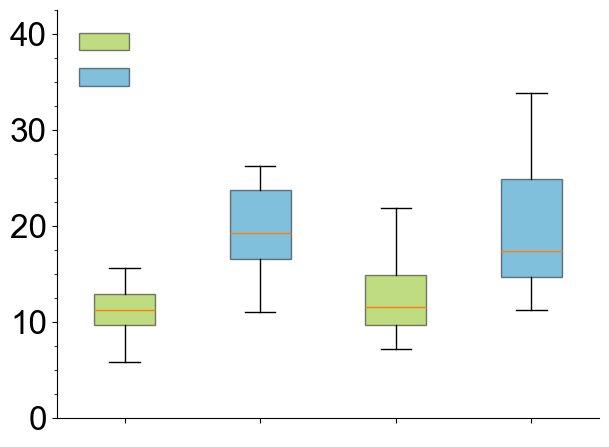

In [ ]:
#new plot for the intensity upon aspiration in early and late embryos in the pipette
fig, ax = plt.subplots(figsize=(7, 5.3), sharey=True)
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['font.size'] = 24
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')  
# Get the data subsets for lateindex and earlyindex
lateindex = np.invert(np.isin(np.arange(data.shape[1]), earlyindex))
late_data = data[1:, lateindex].T
early_data = data[1:, earlyindex].T

# Plot the boxplots
x_locations = np.arange(4)
bplot=plt.boxplot(early_data[:,:2], positions=x_locations[:2],patch_artist=True,widths=0.35)
bplot2=plt.boxplot(late_data[:,:2], positions=x_locations[2:],patch_artist=True,widths=0.35)

colors=["#83bb03","#0383bb","#83bb03","#0383bb"]

for bp in (bplot,bplot2):
    for bplo in bp:
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.5)
# Set the x-axis tick labels
tick_labels = ['', '', '', '']
plt.xticks(x_locations, tick_labels)
plt.legend([bplot["boxes"][0],bplot["boxes"][1]],[" ","  "],loc="upper left",frameon=False,fontsize=18)
plt.yticks(np.arange(0,44,2.5),minor=True)
plt.savefig("H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure2/Pipettes/AspirationBoxplot/EarlyLateKeratinboxPlots_nolab.png",dpi=300,bbox_inches='tight',transparent=True)
plt.savefig("H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure2/Pipettes/AspirationBoxplot/EarlyLateKeratinboxPlots_nolab.svg",dpi=300,bbox_inches='tight',transparent=True)
plt.savefig("H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure2/Pipettes/AspirationBoxplot/EarlyLateKeratinboxPlots_nolab.pdf",dpi=300,bbox_inches='tight',transparent=True)
plt.show()
np.savetxt("H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure2/Pipettes/AspirationBoxplot/EarlyLateKeratinboxPlots_noout.csv",data,delimiter=",",fmt='%s')

In [7]:
data

array([['26112021_Pos010', '26112021_Pos012', '26112021_Pos014',
        '26112021_Pos016', '26112021_Pos018', '26112021_Pos020',
        '26112021_Pos022', '26112021_Pos024', '26112021_Pos026',
        '26112021_Pos028', '26112021_Pos032', '26112021_Pos034',
        '26112021_Pos038', '26112021_Pos040', '26112021_Pos042',
        '26112021_Pos045', '26112021_Pos047', '26112021_Pos049',
        '26112021_Pos051', '15112021_Pos002', '15112021_Pos006',
        '15112021_Pos010', '15112021_Pos012', '15112021_Pos016',
        '15112021_Pos018', '15112021_Pos020', '15112021_Pos024',
        '15112021_Pos026', '15112021_Pos028', '15112021_Pos032',
        '15112021_Pos036', '15112021_Pos038'],
       [11.617, 15.394, 10.746, 11.874, 14.873, 20.174, 8.096, 10.824,
        10.573, 11.149, 15.774, 21.917, 11.689, 9.475, 12.221, 14.501,
        9.468, 10.916, 8.307, 5.81, 9.36, 8.11, 15.572, 13.214, 11.978,
        21.098, 7.195, 14.957, 10.095, 11.467, 9.577, 13.375],
       [18.768, 22.076, 19

In [98]:
cytofolder3="H:/PHD_data/Imaging_et_analysis/Stellaris/2025/07_Juli/08072025_LatB/"
cytoDfolder1="H:/PHD_data/Imaging_et_analysis/Stellaris/2025/07_Juli/05072025_CytoD/"
cytoDfolder2="H:/PHD_data/Imaging_et_analysis/Stellaris/2025/07_Juli/01072025_CytoD/"
latBfiles=glob(cytofolder3+"/*/*Pos0*.csv")
cytoDfiles1=glob(cytoDfolder1+"/*/*Pos0*.csv")
cytoDfiles2=glob(cytoDfolder2+"/*/*Pos0*.csv")
lateindexcyto=["08072025_Pos12","05072025_Pos002","05072025_Pos004"]
earlyindexcyto=["01072025_Pos001","01072025_Pos002","01072025_Pos003","01072025_Pos004","05072025_Pos006","05072025_Pos007","08072025_Pos003","08072025_Pos004","08072025_Pos005","08072025_Pos010","08072025_Pos011"]
def IntensityDatasortingCyto(folders=[cytofolder3,cytoDfolder1,cytoDfolder2],earlyfiles=earlyindexcyto):
    # Initialize variables
    lendata = 0

    # Count the total number of files across all folders
    for folder in folders:
        lendata += len(glob(folder + "\\*\\*Pos0*.csv"))

    # Initialize a numpy array to store data
    data=[]
    current_index = 0
    earlyindex=[]
    # Loop through each folder
    for folder in folders:
        # Get a list of Pip and Out files in the current folder
        pipfiles = glob(folder + "\\*\\*Pos0*.csv")
        folderdat=np.zeros((3, len(pipfiles)), dtype='object')
        idxfd=0
        # Loop through each Pip file
        for pipfile in pipfiles:
            # Extract the position from the Pip file name
            pos = pipfile[pipfile.find("os")-1:pipfile.find("os")+7]
            date= find(r"\d{8}",pipfile)[0]
            fid=date+"_"+pos[:-2         ]

            # Read and plot data from Pip file
            pipdf = pd.read_csv(pipfile, delimiter="[;,,]", engine="python")
            pipdf = pipdf[1::2].reset_index(drop=True)[10:]
                
            pipmax = np.max(pipdf["Mean"])
                
            pipmin = pipdf["Mean"].iloc[0]
                
            # Update data array with current index
            folderdat[2, idxfd] = pipmax
            folderdat[1, idxfd] = pipmin
            folderdat[0, idxfd] = fid
            if fid in earlyfiles:
                earlyindex.append(current_index)
            current_index += 1
            idxfd+=1

        if len(data)==0:
            data=folderdat 
        else:
            data = np.concatenate((data,folderdat), axis=1)
    return data,earlyindex
cytodata,earlyindexcyto=IntensityDatasortingCyto([cytofolder3,cytoDfolder1,cytoDfolder2],earlyfiles=earlyindexcyto)

In [99]:
cytodata

array([['08072025_Pos003', '08072025_Pos004', '08072025_Pos005',
        '08072025_Pos010', '08072025_Pos011', '05072025_Pos002',
        '05072025_Pos004', '05072025_Pos006', '05072025_Pos007',
        '01072025_Pos001', '01072025_Pos002', '01072025_Pos003',
        '01072025_Pos004'],
       [7.43, 12.866, 12.405, 11.253, 10.593, 14.886, 11.592, 11.63,
        10.055, 9.957, 8.181, 9.245, 10.321],
       [12.746, 13.233, 14.881, 15.812, 14.623, 16.642, 11.744, 11.761,
        10.661, 10.761, 8.563, 12.634, 11.641]], dtype=object)

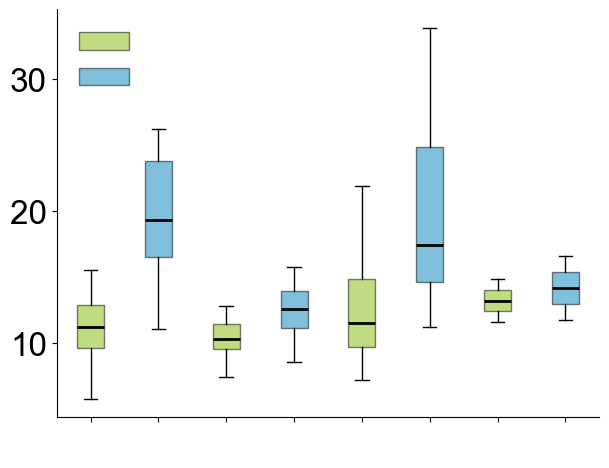

In [101]:
#Plot the box plot of the intensity for early and late embryos in control and cytoD and latB treated embryos
fig, ax = plt.subplots(figsize=(7, 5.3), sharey=True)
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
plt.rcParams['font.size'] = 24  
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = 'Arial'
plt.gca().spines['right'].set_color('none')
plt.gca().spines['top'].set_color('none')
# Get the data subsets for lateindex and earlyindex
lateindex = np.invert(np.isin(np.arange(cytodata.shape[1]), earlyindexcyto))
late_datacyto = cytodata[1:, lateindex].T
early_datacyto = cytodata[1:, earlyindexcyto].T
# Create the x locations for the boxplots
x_locations = np.arange(8)
labels=["",""," ","","",""," ",""]
# Plot the boxplots
bplot=plt.boxplot(early_datacyto, positions=x_locations[2:4],patch_artist=True,tick_labels=labels[:2]
                  ,widths=0.4,medianprops=dict(color='black', linewidth=2))
cbplot=plt.boxplot(early_data[:,:2],positions=x_locations[:2],patch_artist=True,tick_labels=labels[:2]
                   ,widths=0.4,medianprops=dict(color='black', linewidth=2))
cbplot2=plt.boxplot(late_data[:,:2], positions=x_locations[4:6],patch_artist=True,tick_labels=labels[4:6]
                    ,widths=0.4, medianprops=dict(color='black', linewidth=2))
bplot2=plt.boxplot(late_datacyto, positions=x_locations[6:],patch_artist=True,tick_labels=labels[6:]
                   ,widths=0.4, medianprops=dict(color='black', linewidth=2))
colors=["#83bb03","#0383bb","#83bb03","#0383bb"]
for bp in (bplot,bplot2,cbplot,cbplot2):
    for bplo in bp:
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.5)
plt.legend([bplot["boxes"][0],bplot["boxes"][1]],[" ","  "],loc="upper left",frameon=False,fontsize=18)
plt.savefig("H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure2/Pipettes/AspirationBoxplot/CytoDLatBboxPlots_nolab.png",dpi=300,bbox_inches='tight',transparent=True)
plt.savefig("H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure2/Pipettes/AspirationBoxplot/CytoDLatBboxPlots_nolab.svg",dpi=300,bbox_inches='tight',transparent=True)
plt.savefig("H:/PHD_data/Imaging_et_analysis/PaperFigures/Figure2/Pipettes/AspirationBoxplot/CytoDLatBboxPlots_nolab.pdf",dpi=300,bbox_inches='tight',transparent=True)

plt.show()

Position:Pos010 lenStrain:270
Position:Pos012 lenStrain:270
Position:Pos014 lenStrain:270
Position:Pos016 lenStrain:270
Position:Pos018 lenStrain:270


C:\Users\snaik\AppData\Local\Temp\ipykernel_16872\4282319667.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  dataDelIdelSt=pd.concat([dataDelIdelSt,pd.DataFrame({"ID":ID,"delI":delI,"delL":straindf})],ignore_index=True)
C:\Users\snaik\AppData\Local\Temp\ipykernel_16872\4282319667.py:52: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(straindf,delI[:len(straindf)],cmap=colormaps[0],linewidths=0.5,s=45,alpha=1,marker=".")
C:\Users\snaik\AppData\Local\Temp\ipykernel_16872\4282319667.py:52: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(straindf,delI[:len(straindf)],cmap=colormaps[0],linewidths=0.5,s=45,alpha=1,marker=".")
C:\Us

Position:Pos020 lenStrain:270


TypeError: object of type 'ListedColormap' has no len()

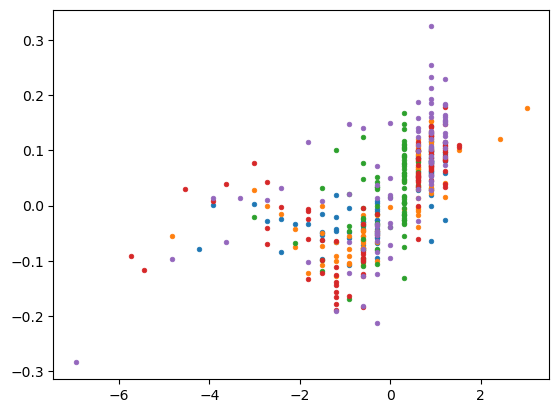

In [10]:
#Strain intensity plot with early late colors
from sklearn.linear_model import LinearRegression
#function to plot the strain vs delIntensity for the 3sets of data contained in light files 1-3 and dark files 1-3
def plotStrainIntensity(lightfiles,darkfiles):
    slope=[]
    strainIntenssitydict={}
    dataDelIdelSt=pd.DataFrame(columns=["ID","delI","delL"])
    for index in range(len(darkfiles)):
        pos="P"+str(darkfiles[index][darkfiles[index].find(r"os"):darkfiles[index].find(r"os")+5])
        darkdf=pd.read_csv(darkfiles[index],delimiter="[;,,]",engine="python")
        darkdfmax=darkdf["microns"].idxmax()
        darkdf=darkdf["microns"][darkdfmax-150:darkdfmax+120].reset_index(drop=True)
        print("Position:{pos} lenStrain:{maxstrain}".format(pos=pos,maxstrain=len(darkdf))) 
        straindf=np.gradient(darkdf[::3])
        date=darkfiles[index][darkfiles[index].find("11_nov\\")+7:darkfiles[index].find("11_nov")+15]
        
        fid=date+"_"+pos
        #for index in range(len(darkdf)):
         #if index>=1:
               #straindf.append(darkdf[index]-darkdf[index-1])
    
        #plt.plot(np.abs(straindf))
        #plt.title(pos)
        #plt.show()
        for file in lightfiles:
                if pos in file:
                    lightdf=pd.read_csv(file,delimiter="[;,,]",engine="python")
                    lightdf=lightdf[::2].reset_index(drop=True)
                    lightdfmax=lightdf["Mean"].idxmax()
                    lightdf=lightdf["Mean"][lightdfmax-150:lightdfmax+120].reset_index(drop=True)
                    delI=np.gradient(lightdf[::3])
                    ID=[pos+"_"+date]*len(delI)
                    dataDelIdelSt=pd.concat([dataDelIdelSt,pd.DataFrame({"ID":ID,"delI":delI,"delL":straindf})],ignore_index=True)
                    #print("Position:{pos} delIntensity:{lendelintensity} delD:{st}".format(pos=pos,lendelintensity=len(delI),st=len(straindf)))
                    #for index in range(len(lightdf)):
                        #if index>=1:
                            #delI.append(lightdf[index]-lightdf[index-1])
                    #delISt=[[delI[x],straindf[x]] for x in range(len(delI)) ]
                    #plt.plot(delI,color="chartreuse")
                    #plt.plot(lightdf/np.max(lightdf),color="orange")
                    #plt.title("Keratin/strain_"+pos)
                    #plt.show()
                    #fit a linear regression to the strain vs change in intensity
                    model=LinearRegression()
                    model.fit(straindf.reshape(-1,1),delI[:len(straindf)])
                    slope.append(model.coef_[0])
                    #fit_value=model.intercept_
                    #r_squared=model.score(straindf.reshape(-1,1),delI)
                    colormaps = [plt.cm.viridis,plt.cm.plasma]
                    strainIntenssitydict[pos]=[straindf,delI]
                    if fid in earlyfiles:
                        plt.scatter(straindf,delI[:len(straindf)],cmap=colormaps[0],linewidths=0.5,s=45,alpha=1,marker=".")
                    else:
                        plt.scatter(straindf,delI[:len(straindf)],color=colormaps[1],linewidths=0.5,s=45,alpha=1,marker=".")#"#BB9703"
                        #colormap_func = plt.colormaps['viridis']
                    #plt.scatter(straindf,delI[:len(straindf)],color=colormap_func(np.linspace(0.,1,len(straindf))),linewidths=0.5,s=45,alpha=1,marker=".")##83bb03colormap_func(np.linspace(0.3,1,len(straindf)))
                    #plt.plot(straindf,model.predict(straindf.reshape(-1,1)),color="grey",linewidth=0.5,alpha=0.3)
                    # Add the slope, fit value, and R-squared value as text to the graph
                    #plt.text(0.05, 0.95, f'Slope: {slope:.2f}\nFit value: {fit_value:.2f}\nR-squared: {r_squared:.2f}\nPos: {pos}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
                    #plt.show()
                    break                   
    outputfolder=darkfiles[0][:darkfiles[0].find(r"Pos")]+r"Analysis\\StrainIntensity\\"
    if not os.path.isdir(outputfolder):
        os.makedirs(outputfolder)
    slopemean=np.mean(slope)
    slopestd=np.std(slope)

    #fitting all the data together

    #model.fit(dataDelIdelSt["delL"].values.reshape(-1,1),dataDelIdelSt["delI"].values)
    #plt.plot(dataDelIdelSt["delL"],model.predict(dataDelIdelSt["delL"].values.reshape(-1,1)),color="gray",linewidth=1,alpha=0.7)
    plt.rcParams['figure.dpi'] = 200 # 200 e.g. is really fine, but slower
    plt.rcParams['font.size'] = 24
    plt.rcParams['savefig.dpi'] = 300
    plt.rcParams['font.family'] = 'sans-serif'
    plt.rcParams['font.sans-serif'] = 'Arial'
    plt.gca().spines['right'].set_color('none')
    plt.gca().spines['top'].set_color('none')
    plt.xticks(np.arange(-10,11,1),minor=True)
    plt.yticks(np.arange(-0.75,0.76,0.1),minor=True)

    plt.xlabel("∂Strain (∂L/∂t)(μm/s)")
    plt.ylabel("∂Intensity (∂I/∂t)\n(a.u./s)")
    pd.DataFrame.from_dict(strainIntenssitydict).to_csv(outputfolder+"StrainIntensity.csv",index=False)
    #plt.text(0.05, 0.95, f'Slope: {slopemean:.2f}\nSlope std: {slopestd:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
    plt.savefig(outputfolder+"StrainIntensity.png",bbox_inches='tight',dpi=300, transparent=True)
    plt.savefig(outputfolder+"StrainIntensity.svg",bbox_inches='tight',dpi=300, transparent=True)
    plt.savefig(outputfolder+"StrainIntensity.pdf",bbox_inches='tight',dpi=300, transparent=True)
    #plt.show()  
    return strainIntenssitydict, dataDelIdelSt
#Folders for analysis
lightfiles=glob(r"H:\PHD_data\Imaging_et_analysis\Sp5imaging\Pipettes\11_nov\26112021\Pos*\*Pip_*csv")
darkfiles=glob(r"H:\PHD_data\Imaging_et_analysis\Sp5imaging\Pipettes\11_nov\26112021\Pos*\*Dark*csv")
lightfiles2=glob(r"H:\PHD_data\Imaging_et_analysis\Sp5imaging\Pipettes\11_nov\24112021\Pos*\*Pip_*csv")
darkfiles2=glob(r"H:\PHD_data\Imaging_et_analysis\Sp5imaging\Pipettes\11_nov\24112021\Pos*\*Dark*csv")
lightfiles3=glob(r"H:\PHD_data\Imaging_et_analysis\Sp5imaging\Pipettes\11_nov\15112021\Pos*\*Pip_*csv")
darkfiles3=glob(r"H:\PHD_data\Imaging_et_analysis\Sp5imaging\Pipettes\11_nov\15112021\Pos*\*Dark*csv")
#plot the strain vs delIntensity for the 3sets of data contained in light files 1-3 and dark files 1-3
sIDt1,dat1 =plotStrainIntensity(lightfiles,darkfiles)
sIDt2, dat2=plotStrainIntensity(lightfiles2,darkfiles2)
sIDt3,dat3=plotStrainIntensity(lightfiles3,darkfiles3)
straindatacombined=pd.concat([dat1,dat2,dat3],ignore_index=True)#,dat3
model=LinearRegression()
model.fit(straindatacombined["delL"].values.reshape(-1,1),straindatacombined["delI"].values)
opfolder="H:\\PHD_data\\Imaging_et_analysis\\PaperFigures\\Figure2\\Pipettes\\StrainIntensity\\"
if not os.path.isdir(opfolder):
    os.makedirs(opfolder)

plt.plot(straindatacombined["delL"],model.predict(straindatacombined["delL"].values.reshape(-1,1)),color="gray",linewidth=1,alpha=0.7)
plt.savefig("H:\\PHD_data\\Imaging_et_analysis\\PaperFigures\\Figure2\\Pipettes\\StrainIntensity\\New2colorStrainIntensity.png",dpi=300,bbox_inches='tight',transparent=True)
plt.savefig("H:\\PHD_data\\Imaging_et_analysis\\PaperFigures\\Figure2\\Pipettes\\StrainIntensity\\New2colorStrainIntensity.svg",dpi=300,bbox_inches='tight',transparent=True)
plt.savefig("H:\\PHD_data\\Imaging_et_analysis\\PaperFigures\\Figure2\\Pipettes\\StrainIntensity\\New2colorStrainIntensity.pdf",dpi=300,bbox_inches='tight',transparent=True)
plt.show()

H:/PHD_data/Imaging_et_analysis/Sp5imaging/Pipettes/11_nov/26112021\Pos010\ResKrtMemIntPip_Pos010.csv
478


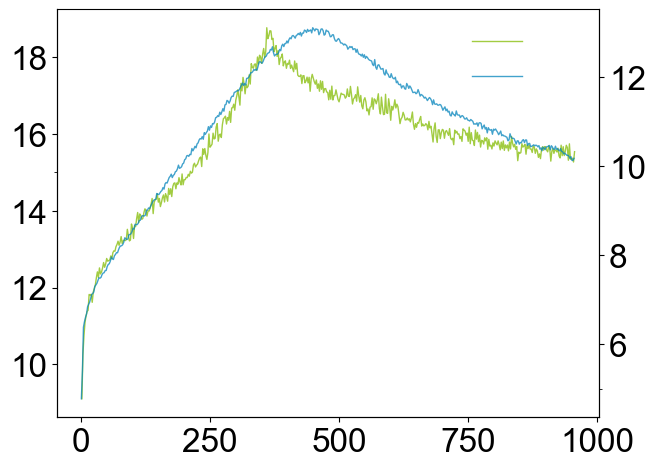

H:/PHD_data/Imaging_et_analysis/Sp5imaging/Pipettes/11_nov/26112021\Pos012\ResKrtMemIntPip_Pos012.csv
479


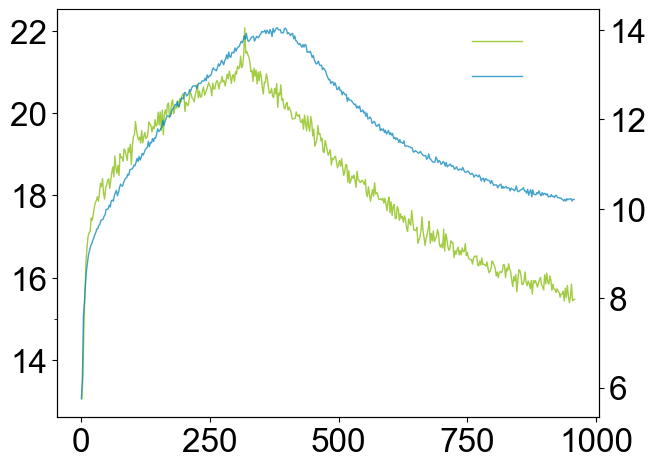

H:/PHD_data/Imaging_et_analysis/Sp5imaging/Pipettes/11_nov/26112021\Pos014\ResKrtMemIntPip_Pos014.csv
680


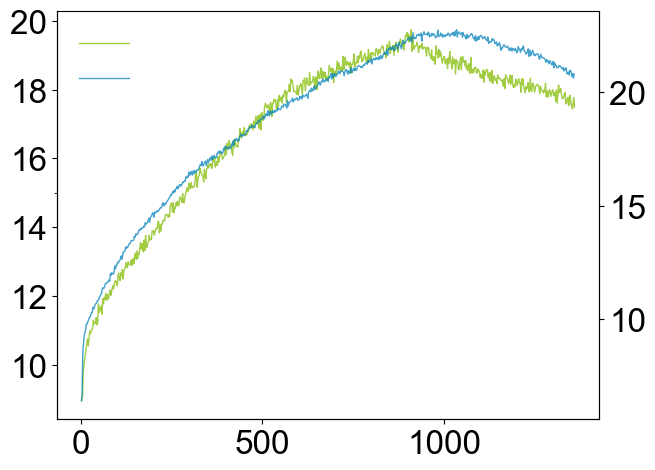

H:/PHD_data/Imaging_et_analysis/Sp5imaging/Pipettes/11_nov/26112021\Pos016\ResKrtMemIntPip_Pos016.csv
309


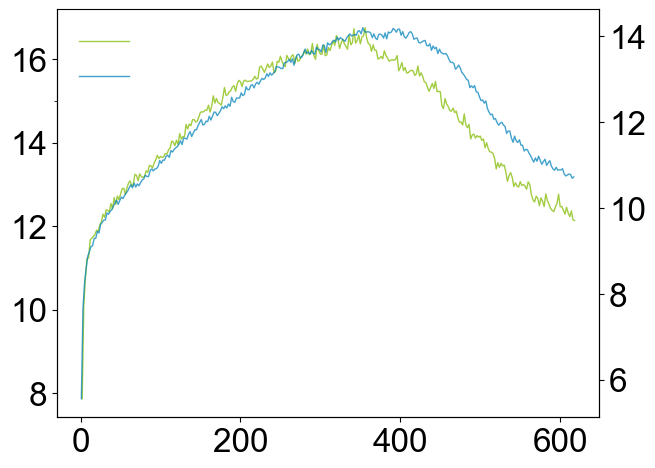

H:/PHD_data/Imaging_et_analysis/Sp5imaging/Pipettes/11_nov/26112021\Pos018\ResKrtMemIntPip_Pos018.csv
489


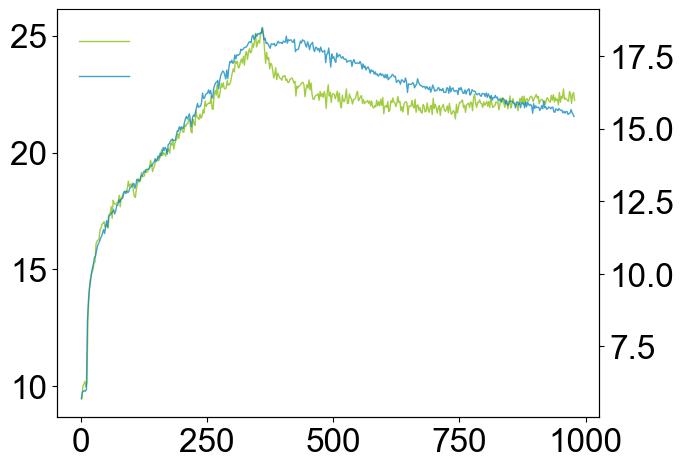

H:/PHD_data/Imaging_et_analysis/Sp5imaging/Pipettes/11_nov/26112021\Pos020\ResKrtMemIntPip_Pos020.csv
532


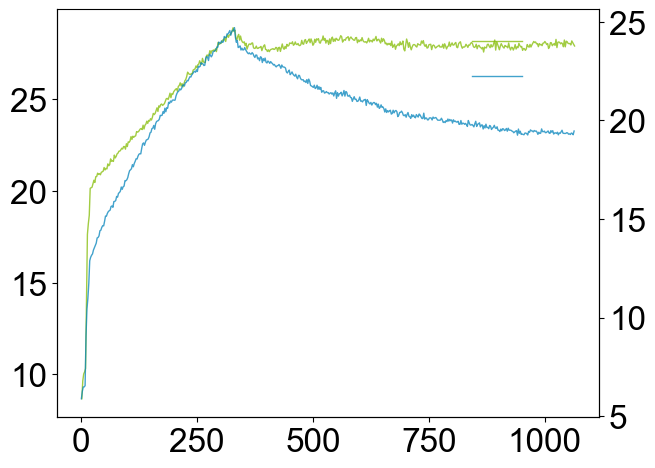

H:/PHD_data/Imaging_et_analysis/Sp5imaging/Pipettes/11_nov/26112021\Pos022\ResKrtMemIntPip_Pos022.csv
H:/PHD_data/Imaging_et_analysis/Sp5imaging/Pipettes/11_nov/26112021\Pos024\ResKrtMemIntPip_Pos024.csv
508


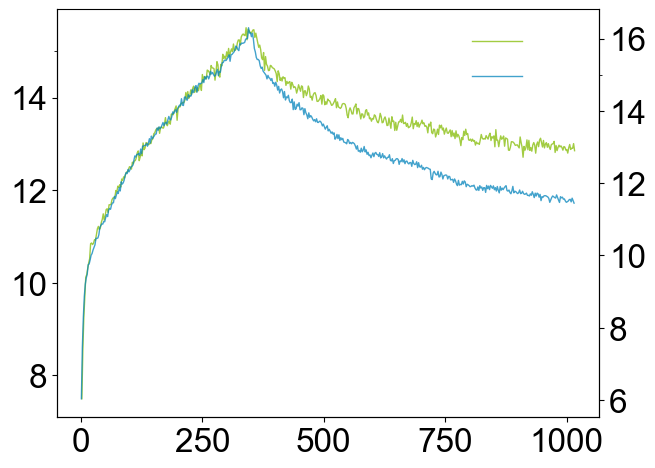

H:/PHD_data/Imaging_et_analysis/Sp5imaging/Pipettes/11_nov/26112021\Pos026\ResKrtMemIntPip_Pos026.csv
477


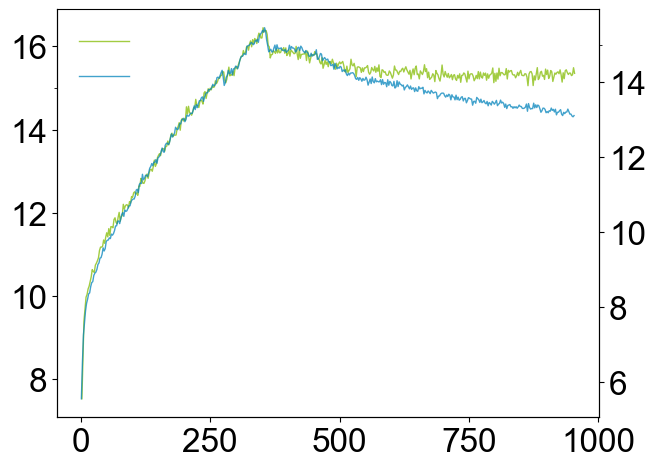

H:/PHD_data/Imaging_et_analysis/Sp5imaging/Pipettes/11_nov/26112021\Pos028\ResKrtMemIntPip_Pos028.csv
478


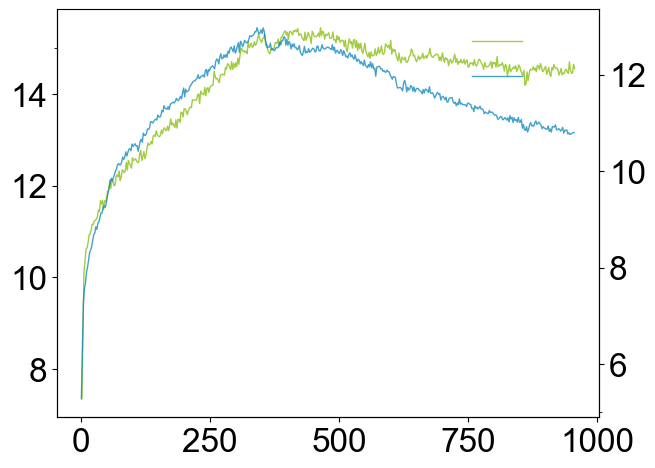

H:/PHD_data/Imaging_et_analysis/Sp5imaging/Pipettes/11_nov/26112021\Pos032\ResKrtMemIntPip_Pos032.csv
478


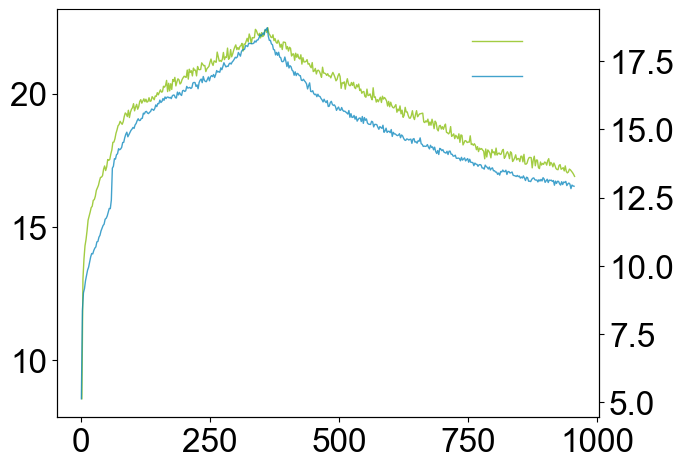

H:/PHD_data/Imaging_et_analysis/Sp5imaging/Pipettes/11_nov/26112021\Pos034\ResKrtMemIntPip_Pos034.csv
478


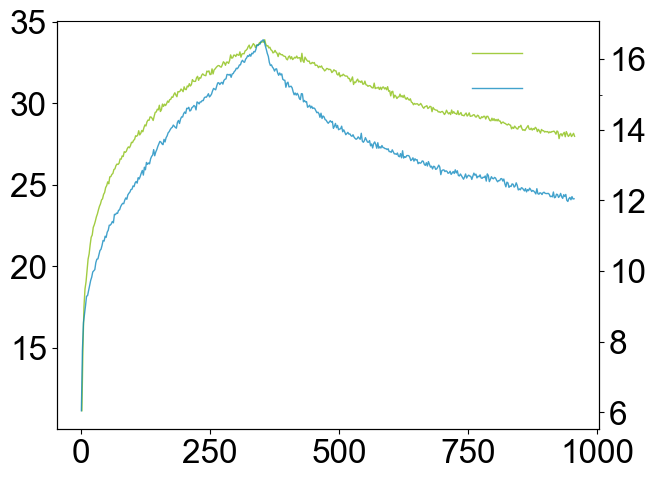

H:/PHD_data/Imaging_et_analysis/Sp5imaging/Pipettes/11_nov/26112021\Pos036\ResKrtMemIntPip_Pos036.csv
H:/PHD_data/Imaging_et_analysis/Sp5imaging/Pipettes/11_nov/26112021\Pos038\ResKrtMemIntPip_Pos038.csv
418


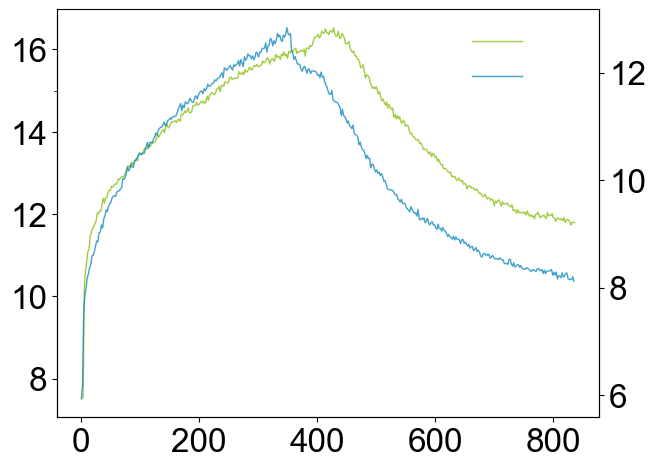

H:/PHD_data/Imaging_et_analysis/Sp5imaging/Pipettes/11_nov/26112021\Pos040\ResKrtMemIntPip_Pos040.csv
451


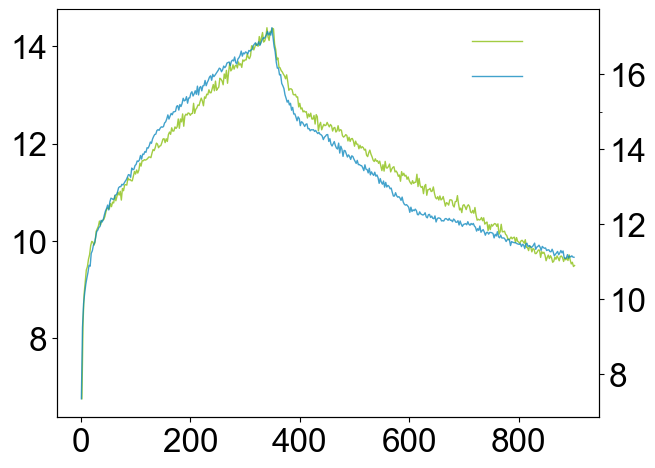

H:/PHD_data/Imaging_et_analysis/Sp5imaging/Pipettes/11_nov/26112021\Pos042\ResKrtMemIntPip_Pos042.csv
531


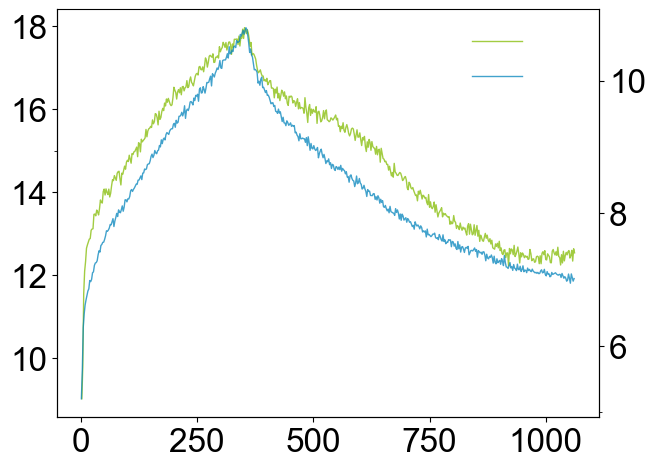

H:/PHD_data/Imaging_et_analysis/Sp5imaging/Pipettes/11_nov/26112021\Pos044\ResKrtMemIntPip_Pos044.csv
H:/PHD_data/Imaging_et_analysis/Sp5imaging/Pipettes/11_nov/26112021\Pos045\ResKrtMemIntPip_Pos045.csv
401


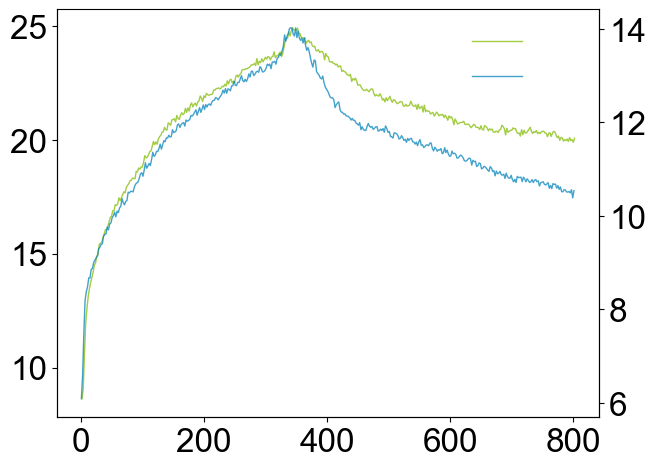

H:/PHD_data/Imaging_et_analysis/Sp5imaging/Pipettes/11_nov/26112021\Pos047\ResKrtMemIntPip_Pos047.csv
531


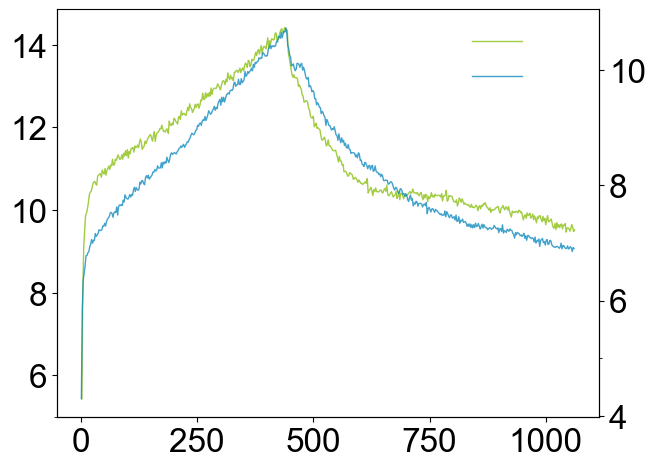

H:/PHD_data/Imaging_et_analysis/Sp5imaging/Pipettes/11_nov/26112021\Pos049\ResKrtMemIntPip_Pos049.csv
359


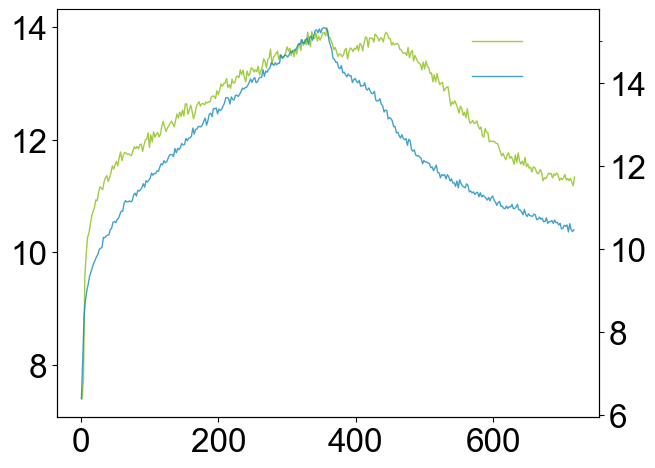

H:/PHD_data/Imaging_et_analysis/Sp5imaging/Pipettes/11_nov/26112021\Pos051\ResKrtMemIntPip_Pos051.csv
418


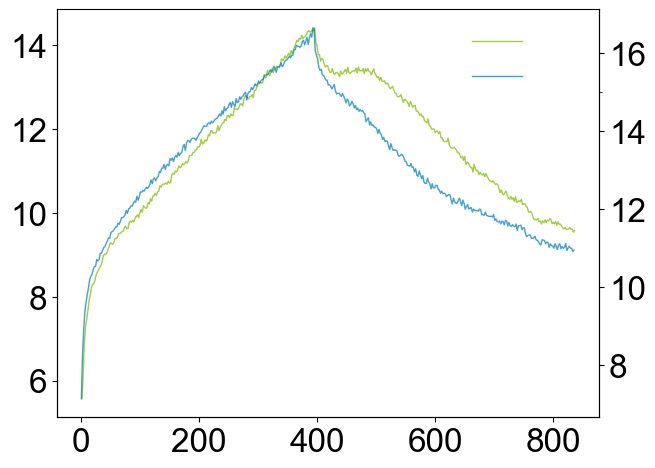

In [ ]:
#plot the intensity of pipette in time


lightfiles=glob(r"H:/PHD_data/Imaging_et_analysis/Sp5imaging/Pipettes/11_nov/26112021/Pos*/*Pip_*csv")

#lightfiles2=glob(r"H:/PHD_data/Imaging_et_analysis/Sp5imaging/Pipettes/11_nov/24112021/Pos*/*Pip_*csv")
#lightfiles3=glob(r"H:/PHD_data/Imaging_et_analysis/Sp5imaging/Pipettes/11_nov/15112021/Pos*/*Pip_*csv")
#lightfiles=lightfiles+lightfiles2+lightfiles3

exclud=["H:/PHD_data/Imaging_et_analysis/Sp5imaging/Pipettes/11_nov/26112021\Pos044\ResKrtMemIntPip_Pos044.csv","H:/PHD_data/Imaging_et_analysis/Sp5imaging/Pipettes/11_nov/26112021\Pos036\ResKrtMemIntPip_Pos036.csv","H:/PHD_data/Imaging_et_analysis/Sp5imaging/Pipettes/11_nov/26112021\Pos022\ResKrtMemIntPip_Pos022.csv"]
combdfkrt=[]
combdfutr=[]
combtime=[]
for file in lightfiles:
    print(file)
    folder=file[:file.find(r"Pos")]
    if "_Pos" in file and file not in exclud:
        lightdf=pd.read_csv(file,delimiter="[;,,]",engine="python")
        krtdf=lightdf[1::2].reset_index(drop=True)
        utrdf=lightdf[::2].reset_index(drop=True)
        dfmloc=krtdf["Mean"].max()
        print(len(krtdf["Mean"]))
        if len(combtime)==0:
            combtime=krtdf.iloc[:,0]
            combdfkrt.append(krtdf["Mean"][:750])
            combdfutr.append(utrdf["Mean"][:750])
        else:
            combdfkrt.append(krtdf["Mean"][:750])
            combdfutr.append(utrdf["Mean"][:750])
        fig,ax1=plt.subplots(figsize=(7, 5.3), sharey=True)
        plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
        plt.rcParams['font.size'] = 24
        plt.rcParams['savefig.dpi'] = 300
        plt.rcParams['font.family'] = 'sans-serif'
        plt.rcParams['font.sans-serif'] = 'Arial'
        
        plt.gca().spines['top'].set_color('none')
        ax2 = ax1.twinx()  

        ax1.set_yticks(np.arange(0,krtdf["Mean"].max()+3,5),minor=True)
        ax2.set_yticks(np.arange(0,utrdf["Mean"].max()+3,5),minor=True)
        ax1.plot(krtdf.iloc[:750,0],krtdf["Mean"][:750],color="#83bb03",linewidth=1,alpha=0.75)
        ax2.plot(utrdf.iloc[:750,0],utrdf["Mean"][:750],color="#0383bb",linewidth=1,alpha=0.75)
        #plt.legend([ax1.get_lines()[0],ax2.get_lines()[0]],["     ","  "],loc="best",frameon=False,fontsize=18)
        plt.savefig(folder+file[file.find("Pos"):file.find(".csv")]+".png",dpi=300,bbox_inches='tight',transparent=True)
        plt.savefig(folder+file[file.find("Pos"):file.find(".csv")]+".svg",dpi=300,bbox_inches='tight',transparent=True)
        plt.savefig(folder+file[file.find("Pos"):file.find(".csv")]+".pdf",dpi=300,bbox_inches='tight',transparent=True)    
        plt.show()

